# Algoritmi e Strutture Dati

##  Cool Stuff - Siti per fare pratica

- https://www.hackerrank.com/
- https://leetcode.com/
- https://codesignal.com/

## TODO
- slider?
- plot easy
- TOC per github https://github.com/HugoGuillen/ipythontoc

# Utilities

raccolta di funzioni utili e snippets vari

## Formule LaTeX in Celle Python

nelle formule si possono usare anche variabili proprie

In [6]:
from IPython.display import display, Math, Latex
display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))

<IPython.core.display.Math object>

## Genera Liste Casuali

In [142]:
import random
def make_random_list(length):
    ret = []
    for i in range(length):
        ret.append(random.randint(0,length))
    return ret

# Introduzione

04.03.2025

vedi PrimaLezione.ipynb

# Insertion Sort

05.03.2025 


In [6]:
def insertion_sort(lista,n=None):
    if n==None:
        n=len(lista)
    for i in range(1,n):
        key = lista[i]
        j=i-1
        while j>=0 and lista[j]>key:
            lista[j+1]=lista[j]
            j=j-1
        lista[j+1]=key

In [ ]:
lista=[1,4,6,2,4,65]
%time insertion_sort(lista)
print(lista)

lista=[3,5,5,7,8,3,45,3,8,7,345,578,2]
%time insertion_sort(lista)
print(lista)

%time lista=make_random_list(10)
%time insertion_sort(lista)
print(lista)

%time lista=make_random_list(100)
%time insertion_sort(lista)

# Sottoarray threshold frequenza - Peak finder

07.03.2025

vedi LAB - I tbp.ipynb

In [23]:
# input
## array of integers len() <= 10**5 arr[i] <= 10**5
arr = [1,2,3,4,5,3,3,3,3,4,5,6,2,4,5,3,4,5,6,7,3,4]
# frequency threshold 1 <= threshold <= 10**3
threshold = 2
# trovare il sottoarray in cui un elemento si ripete piu' di threshold volte



In [5]:
import random
def make_random_list(length):
    """
    crea una lista di lunghezza `length` popolata di valori casuali da 0 a `length`
    """
    ret = []
    for i in range(length):
        ret.append(random.randint(0,length))
    return ret

In [52]:
def sottoarray_freq(arr,threshold):
    # scorri array
    # dict valore { conto, primo, ultimo }
    # per ogni valore piu' frequente di threshold
    # trova prima e ultima occorrenza del valore
    myvals={}
    for i,v in enumerate(arr):
        if v in myvals:
            myvals[v]['count'] = myvals[v]['count']+1
            myvals[v]['ultimo'] = i
        else:
            myvals[v]={}
            myvals[v]['primo'] = i
            myvals[v]['count'] = 1
            myvals[v]['ultimo'] = i

    smallest_subarray_len=len(arr)
    smallest_value=0
    for k,v in myvals.items():
        if v['count'] > threshold:
            if (v['ultimo']-v['primo']) < smallest_subarray_len:
                smallest_value=k
                smallest_subarray_len=v['ultimo']-v['primo']
    
    ret = {smallest_value: arr[myvals[smallest_value]['primo']:myvals[smallest_value]['ultimo']]}
    return ret

In [46]:
def sottoarray_freq_count(arr,threshold):
    """
    variante che usa list.count() invece di incrementare un contatore.

     o scorri array
     o ret = dict { valore: { conto, primo, ultimo } }
     o per ogni valore piu' frequente di threshold
     o trova prima e ultima occorrenza del valore
    """
    myvals={}
    for i,v in enumerate(arr):
        if v in myvals:
            myvals[v]['ultimo'] = i
        else:
            myvals[v]={}
            myvals[v]['primo'] = i
            myvals[v]['count'] = arr.count(v)
            myvals[v]['ultimo'] = i

    smallest_subarray_len=len(arr)
    smallest_value=0
    for k,v in myvals.items():
        if v['count'] > threshold:
            if (v['ultimo']-v['primo']) < smallest_subarray_len:
                smallest_value=k
                smallest_subarray_len=v['ultimo']-v['primo']
    
    ret = {smallest_value: arr[myvals[smallest_value]['primo']:myvals[smallest_value]['ultimo']]}
    return ret

In [57]:
arr = make_random_list(300)

In [59]:
%time sottoarray_freq(arr,2)

CPU times: user 207 μs, sys: 5 μs, total: 212 μs
Wall time: 217 μs


{25: [25, 249, 22, 99, 25]}

In [60]:
%time sottoarray_freq_count(arr,2)

CPU times: user 1.19 ms, sys: 0 ns, total: 1.19 ms
Wall time: 1.2 ms


{25: [25, 249, 22, 99, 25]}

## altre soluzioni

### tutte le sottoliste

2**N sicuro?

### doppio for

per

## Peak Finder

trova i picchi in una lista

picco quando i-1 e i+1 < 1

per i=0 i-1=-inf


per i>len(arr) i+1=-inf

In [86]:
def find_peaks(arr):
    ret={}
    last=len(arr)-1
    for i,v in enumerate(arr):
        if i==0:
            if v > arr[i+i]:
                ret[i]=['-inf', v, arr[i+1]]
        elif i==last:
            if v > arr[i-1]:
                ret[i]=[arr[i-1], v, '-inf']
                break
        if arr[i-1] < v and arr[i+1] < v:
          ret[i]=[arr[i-1], v, arr[i+1]]  
    return ret

In [44]:
def find_peaks_casilimite(arr):
    ret={}
    last=len(arr)-1
    if arr[1] > arr[0]:
        ret[0]=['-inf', arr[0], arr[1]]
    if arr[-1] > arr[-2]:
        ret[last]=[arr[-2], arr[-1], '-inf']
    for i,v in enumerate(arr):
        if (i>0 and i<last) and arr[i-1] < v and arr[i+1] < v:
          ret[i]=[arr[i-1], v, arr[i+1]]  
    return ret

In [92]:
%time a = find_peaks(arr)

CPU times: user 89 μs, sys: 2 μs, total: 91 μs
Wall time: 94.9 μs


In [93]:
%time a = find_peaks_casilimite(arr)

CPU times: user 84 μs, sys: 2 μs, total: 86 μs
Wall time: 89.4 μs


In [94]:
a=[1,3,7,4,3,6,2]

ci sono caratteristiche geometriche per evitare di controllare tutti i numeri?

binary search - divido la lista a meta'

trovare un algoritmo <N in complessita'
soluzione sublineare nell'ordine di log(N) emerge dal fatto che splittiamo l'albero


# find-a-peak (lez. precedente) - 

11.03.2025

```python
arr=[1,3,7,4,3,6,2]
```

i numeri potevano essere uguali

```python
arr[i] != arr[i+1]
```

-inf

In [43]:
def peak_element(arr):
    """
    questa funzione ritorna l'index del primo picco trovato nell'array arr
    note: per trovare tutti i picchi e' piu' efficiente questo o il precedente?
    """
    n = len(arr)
    # elemento singolo
    if n==1:
        return 0
    if arr[0] > arr[1]:
        return 0
    if arr[n-1] > arr[n-2]:
        return n-1

    lo,hi=1,n-2
    while lo <= hi:
        mid = lo + (hi - lo) // 2  # floor division
        # se l'elemento a mid e' un picco allora ritornalo
        if arr[mid] > arr[mid-1] and arr[mid] > arr[mid+1]:
            return mid
        # se non accade ho due condizioni:
        #   o dx e' >, allora il picco e' nel sottoarray dx
        if arr[mid] < arr[mid+1]:
            lo=mid+1
        #   o altrimenti e' a sx e il picco nel sottoarray di sx
        else:
            hi=mid-1

In [7]:
arr=[1,2,4,5,7,8,3]

# recap settimana scorsa

## sorting - insertion sort

input 

```
[a1,a2,..,an]
```

da riordinare in modo che

```
a1 <= a2 <= ... <= an
```

abbiamo pescato una carta per volta e posizionata nell'indice giusto dell'array

REMINDER: ci sono due cose tra le altre che riteniamo piu' importanti in un algoritmo:
- efficienza (ingenuamente chiamata tempo di esecuzione) ed efficienza spaziale
- correttezza

In [20]:
def insertion_sort(arr,n):
    """
    pesca una carta per volta e la posiziona nell'indice giusto dell'array
    """
    for i in range(1,n):
        key = arr[i]
        j = i-1
        while j>0 and arr[j] > key:
            a[j+1] = a[j]
            j = j-1
        arr[j+1] = key

# Correttezza: Invarianza di ciclo

Ora andiamo a vedere la correttezza. In particolare l'invarianza di ciclo.

Si basa su tre fasi.

Possiamo verificare che un algoritmo si comporta correttamente verificando queste tre proprieta'.

## Fase 1: Inizializzazione

All'inizio dell'algoritmo l'array e' ordinato: quando pesco la prima carta, per definizione essa sara' nel giusto ordine.

Significa che quando inizia l'algoritmo, la proprieta' e' verificata.

## Fase 2: Mantenimento

Ad ogni iterazione `i+1` manteniamo l'ordinamento, ovvero all'`i`-esima iterazione il subarray di riferimento sara' ordinato.

Parte centrale dell'algoritmo.

Andrebbe dimostrata ma per ora ci fidiamo.

## Fase 3: Termination - Finalizzazione

Dopo l'ultima iterazione l'array di riferimento sara' ordinato - o la proprieta' dell'algoritmo sara' verificata.

# Efficienza - Tempo di Esecuzione

## Assumiamo il modello RAM: Random Access Machine

Le operazioni sono eseguite una dopo l'altra.

Cio' implica che non ci sono operazioni concurrent.

## L'altra assunzione e' che ogni istruzione impiega lo stesso quantitativo di tempo di ogni altra istruzione.

es. settare una variabile e richiamarla

## Come misuro il tempo di esecuzione?

### A. misuro con il cronometro (o `%time`)

Problema: con input diversi ottengo tempi diversi, difficile calcolare la complessita'.

### B. Quali caratteristiche dell'input dobbiamo andare a guardare?

Quale combinazione?

Best case: (es. insertion sort su n elementi) quando l'array e' gia' ordinato perche' salta il `while`.

Worst case: l'array e' ordinato al contrario, `while` fara' il numero massimo di iterazioni.

Per fare qualcosa di generalizzabile devo guardare al numero di elementi n.

### Contiamo il numero di istruzioni e accesso ai dati

Contiamo il costo contando quante volte le righe di codice vengono eseguiteContiamo il costo contando quante volte le righe di codice vengono eseguite

In [23]:
def insertion_sort(arr,n):
    """
    pesca una carta per volta e la posiziona nell'indice giusto dell'array
    """
    for i in range(1,n):                       # C_1 eseguito N volte
        key = arr[i]                           # C_2 eseguito N-1 volte
        # commento                             # C_3 eseguito 0 volte
        j = i-1                                # C_4 eseguito N-1 volte
        while j>0 and arr[j] > key:            # C_5 eseguito un numero variabile di volte ∑ t_i
            a[j+1] = a[j]                      # C_6 eseguito (∑ da i=1 a n di t_i - 1 )
            j = j-1                            # C_7 eseguito (∑ da i=1 a n di t_i - 1 )
        arr[j+1] = key                         # C_8 eseguito N-1 volte

## Calcoliamo la complessita'
$$
\begin{align}
T(n) &= C_1 \cdot N  \\
 &+ C_2 \cdot (N-1) \\
 &+ C_3 \cdot 0 \\
 &+ C_4 \cdot (N-1) \\
 &+ C_5 \cdot \sum t_i \\
 &+ C_6 \cdot \sum_{i=1}^{n} t_i - 1 \\
 &+ C_7 \cdot \sum_{i=1}^{n} t_i - 1 \\
 &+ C_8 \cdot (N-1)
\end{align}
$$

## Best Case
$$
\begin{align}
T(n) &= C_1 * n \\
&+ C_2 \cdot (N-1) \\
&+ C_3 \cdot 0 \\
&+ C_4 \cdot (N-1) \\
&+ C_5 \cdot (N-1) \\
&+ C_8 \cdot (N-1) \\
&= C_1 \cdot n  \\
&+ C_2 \cdot n  \\
&+ C_4 \cdot n \\
&+ C_5 \cdot n \\
&+ C_5 \\
&+ C_8 \cdot n \\
&+ C_8 \\
&= (C_1 + C_2 + C_4 + C_5 + C_8 ) \cdot n - (C_2 + C_4 + C_5 + C_8) \\
&= a \cdot n + b \\
&= T(n)
\end{align}
$$

funzione lineare - linear function in N

non e' male.

## Worst Case

$$
\begin{align}
T(n) &= C_1 \cdot n \\
&+ C_2 \cdot (n-1) \\
&+ C_3 \cdot 0 \\
&+ C_4 \cdot (n-1) \\ 
&+ C_5 \cdot ( \sum_{i=1}^{n}i ) \\
&+ C_6 \cdot ( ( \sum_{i=1}^{n}i )-1 )  \\
&+ C_7 \cdot ( ( \sum_{i=1}^{n}i )-1 ) \\
\end{align}
$$

$$
\sum_{i=1}^{n}i
$$

```
T(n) =
C_1 * n
+ C_2 * (N-1)
+ C_4 * (N-1)
+ C_5 * (∑ i=1 a N di i)
+ C_6 * (∑ i=1 a N di i-1)
+ C_7 * (∑ i=1 a N di i-1)
+ C_8 * (N-1)
=
C_1 * n
+ C_2 * (N-1)
+ C_4 * (N-1)
+ C_5 * ( (n*(n-1))/2) -1 )
+ C_6 * (n*(n-1))/2
+ C_7 * (n*(n-1))/2
+ C_8 * (N-1)
= C_1 * n
+ C_2 * n
- C_2
+ C_4 * n
- C_4
...
=

=
an**2+bn+c
```
```
note ∑ da i=1 a N di i = (n*(n-1))/2
```

nel caso peggiore abbiamo qualcosa che dipende in maniera quadratica da N.

ha lo stesso significato di un doppio for su N.


# Notazione Asintotica

aka La Lezione piu' Noiosa dell'Anno

12.03.2025 

vedi Visualizzazione_complessita.ipynb

ieri abbiamo analizzato il costo dell'operazione per l'insertion sort per due casi specifici:
- best case, quando l'array era gia' ordinato: an+b
- worst case, quanto gli elementi erano ordinati in ordine decrescente: an^2+bn+c

stiamo cercando di capire quanto sia efficiente, ora in termini di tempo, il nostro algoritmo.

Abbiamo dei problemi a capire come fare. Cronometrare non e' la maniera migliore, e come abbiamo visto a seconda dei casi il conto puo' variare parecchio.


Abbiamo quindi una discrepanza. Come la risolviamo?

Definiamo diversi tempi computazionali:
- best case
- worst case
- expected case - lo vedremo piu' avanti

con qualche eccezione, durante il corso ci riferiremo normalmente al worst case. Perche'?

## Perche' il Worst Case

1. Perche' ci da delle garanzie che non potra' andare peggio di cosi'
"se qualcosa puo' andare storto, lo fara'".
Non dire mai al tuo capo che farai una cosa in una settimana se gli andra' bene fartela fare in due.
2. Il caso peggiore potrebbe essere molto frequente. es. ricerca in un database. se l'elemento cercato non e' presente la tabella viene scorsa dall'inizio alla fine.
3. Il caso "medio" spesso performa come il peggiore. es. nell'insertion sort

Piu' che al calcolo preciso della complessita', siamo interessati a una misura approssimata, che sia piu' grossolana.

In particolare la domanda e' che succede se faccio andare n a infinito?

Succede che abbiamo quella che chiamiamo "notazione asintotica" che useremo per parlare della complessita' di un algoritmo.

## Notazione Asintotica

La piu' importante e' la O-grande notation, anche chiamata Beacon Notation.

Informalmente


### O-Grande Notation 
La notazione O-grande caratterizza un limite superiore (upper bound) sul comportamento asintotico di una funzione.

Quindi ci dice che una funzione non cresce piu' velocemente di un certo tasso di crescita, determinato dal termine di ordine superiore.

es.

nell'espressione $7n^3+100n^2-20n+6$ il termine di ordine superiore e' $n^3$.

Quindi possiamo dire che la funzione appartiene all'ordine $O(n^3)$.

Quindi non crescera' neanche piu' di $O(n^4)$ per esempio. 

Quindi posso scrivere che sara' $O(n^c)$, $ \forall c \ge 3$.

La notazione O-grande e' la piu' utilizzata e il concetto piu' importante di questa lezione.

Altre notazioni sono:

### Ω-Notation

La Ω-notation caratterizza un limite inferiore sul comportamento asintotico di una funzione.

Quindi ci dice che una funzione cresce almeno alla velocita' di un certo tasso di crescita, sempre basandosi su termini di ordine superiore.

es.

$7n^3+100n^2-20n+6$

Il termine superiore e' $n^3$, in particolare possiamo dire che questa funzione e' $\omega(n^3)$, ma anche di $\omega(n^2)$ e $\omega(n)$.

In generale e'

$\omega(n^c)$, $\forall c \le 3$

### Θ-Notation - Notazione Θ-grande

Θ-notation caratterizza un tight-bound (limite stretto? T2C?) sul comportamento asintotico di una funzione.

Questo ci dice che una funzione cresce precisamente a un certo tasso di crescita, determinato dal termine di ordine superiore.

Se dimostriamo che una funzione e' sia O(f(n)) che Ω(f(n)), per qualche funzione f(n), allora abbiamo mostrato che la funzione e' Θ(f(n)).

es. $7n^3+100n^2-20n+6$ e' O(n^3), e' Ω(n^3), quindi e' Θ(n^3)

Usiamo Ω quando possiamo dire che un algoritmo andra' almeno in un modo, ma non sappiamo come andra' nel peggiore dei casi.

La notazione Θ non viene usata moltissimo 

Per ragioni storiche O-grande viene usata molto di piu', anche nei casi in cui Θ-grande sarebbe piu' appropriato.

### Torniamo a O-grande

che e' un upper-bound asintotico.

Per ogni funzione g(n), denotiamo con O(g(n)) l'insieme delle funzioni 

$O(g(n)) = { f(n): esistono delle costanti positive} c e n_0 t.c. 0 \le f(n) \le c\cdot g(n) per n \ge n_0 \right} $


## Piccola Preview di numpy e matplotlib

numpy e' una lib per operazioni vettoriali e su matrici che semplifica

matplotlib si utilizza per le visualizzazioni

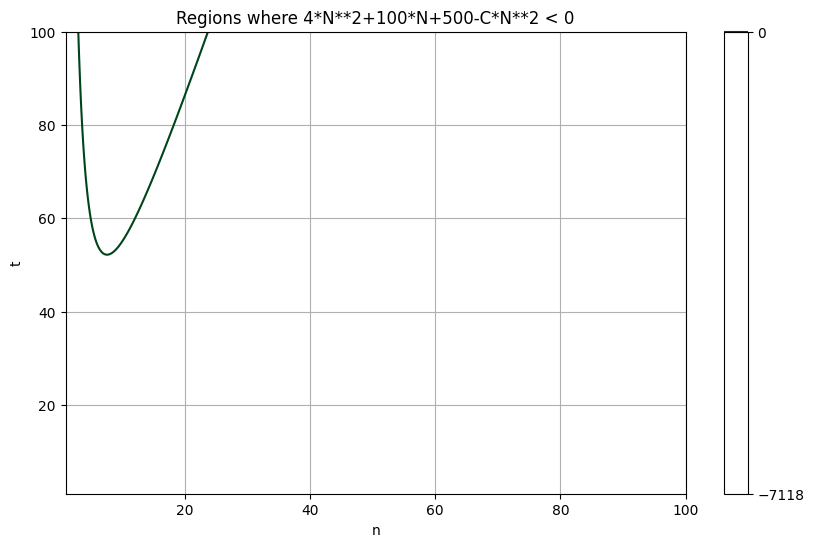

In [5]:
# numpy e matplotlib
import numpy as np
import matplotlib.pyplot as plt


n_range = np.linspace(1,100,400) # crea un vettore da 1 a 100 con 400 numeri
c_range = np.linspace(1,100,400)

# creo una griglia - esplodo le dimensioni, creo una matrice, un reticolo, usando
# non essendo nel mondo simbolico ma computazionale, valuteremo la funzione su tutti questi punti per vedere quando la disuguaglianza e' verificata e quando non lo e'
N, C = np.meshgrid(n_range, c_range)

# f(n)
# vogliamo capire se appartiene all'ordine di O(n**2)
Z = 4*N**3 + 100*N + 500 - C*N**2

# plot
plt.figure(figsize=(10,6))

# definiamo un contorno - contour plot
contour = plt.contour(N,C,Z,levels=[np.min(Z),0],cmap="Greens")
plt.colorbar(contour)

# plottiamo
plt.title("Regions where 4*N**2+100*N+500-C*N**2 < 0")
plt.xlabel("n")
plt.ylabel("t")
plt.grid(True)
plt.show()

l'area verde ci dira'

da n_0 in poi la disuguaglianza e' verificata

quindi f(n) appartiene effettivamente alla famiglia di n^2

in particolare ci interessa quando assume valori negativi e quindi e' verificata la condizione.

a seconda di c avro' degli n_0 diversi




# passiamo alla Ω-notation che e' il lower-bound asintotico.

Data una funzione g(n), denotiamo con Ω(g(n)) l'insieme delle funzioni Ω(g(n)) = {f(n) t.c. esistono delle costanti positive c e n_0 t.c. 0<=c*g(n)<=f(n) \forall n >= n_0 }

es. grafico piu' intuitivo quaderno (1) e (2)

# passiamo alla Θ-notation

data una funzione g(n) denotiamo con Θ(g(n)) l'insieme delle funzioni Θ(g(n)) = {f(n) t.c. esistono delle costanti positive c_1,c_2 e n_0 t.c. 0 <= c_1*g(n) <= f(n) <= c_2*g(n) \forall n>= n_0}

quaderno (3)

da sapere che ci sono anche le notazioni o-piccola e omega-piccola che faremo in futuro

da ricordare sempre la def di O-grande e la consapevolezza che viene usata in maniera impropria al posto di theta-grande

# Insertion Sort in Python - Homework 1

14.03.2025 laboratorio 

vedi notebook in `homework01/`

# Balanced Parenthesis

18.03.2025 - laboratorio

vedi LAB_II_tbp.ipynb

Viene fornita una stringa con alfabeto di sole parentesi


Ritorna un boolean `is_balanced` che indica se le parentesi matchano in ordine.

In [17]:
def validate_bracket_string(stringa):
    """
    valida una stringa che deve essere di sole parentesi
    """
    pass

In [19]:
import random

def generate_random_bracket_string(length):
    """
    funzione inutile cosi' com'e' fatta perche' non genera (quasi) mai parentesi che matchano
    """
    ret=[]
    alphabet="{}[]()"
    alphabet_length = len(alphabet)
    for i in range(length):
        ret.append(alphabet[random.randint(0,1000)%alphabet_length])
    return "".join(ret)

In [29]:
# scorre tutto l'array
# c e' aperto
# e incrementa o decrementa il conto delle parentesi

# usa un dict per le matching brackets


# insieme:
# - parentesi aperta: va bene
# - parentesi chiusa: c'e' una parentesi aperta prima?
# serve una lista open_brackets=[] per tenere traccia delle parentesi aperte
# faccio un for char in string
#   if is_open: open_brackets.append(char)
#   else:

def is_balanced_fatto_insieme(stringa):
    matching_brackets={"[","]","{","}","(",")"}
    opening_brackets="[{("
    open_brackets=[]
    for char in stringa:
        if char in opening_brackets:
            open_brackets.append(char)
        else:
            # se la lista e' vuota non ci piace
            if len(open_brackets) == 0:
                return False
            # confronto se char matcha l'ultimo elemento di open_brackets usando il dict
            # rimuovo l'ultimo elemento
            if char == matching_brackets[open_brackets.pop()]:
                continue
            else:
                return False
    # controllo che open_brackets e' vuoto
    if len(open_brackets) > 0:
        return False
    
    return True        

# Passiamo all'homework
# Adesso ci confondiamo un po' le idee, vedendo come avremmo dovuto consegnare in un'altra vita.
# Introduciamo la libreria `argparse`



```python
import argparse

def main(s):
    print(s)

# controlla se il file .py e' stato eseguito. non si verifica se il file e' stato importato come libreria.
if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("-s",type=str,help="s e' la stringa da stampare")
    args = parser.parse_args()
    main(args.s)
    main()
```

# Nuovo esercizio: Robot Path Simulator

Programmiamo un robot che si muove in una griglia 2d partendo da 0,0 affacciandosi a nord.

una stringa di istruzione comanda il robot es. F forward L ruota a sx R ruota a destra

una funzione tornera' True se il robot torna a 0,0 e False altrimenti.

nord=(,+1)
est=(+1,)

In [17]:
def is_robot_back_to_start(lista_movimenti):
    # per determinare la direzione uso un array di sommatori/sottrattori di coordinate.
    # avanzare sara' la somma element-wise degli array posizione_attuale e direzione.
    # cambiare direzione sara' incrementare o decrementare l'integer segna-indice 
    #   dell'array direzione.
    # per rendere l'array circolare l'indice verra' ottenuto col modulo: 
    #   indice = posizione_indice % len(direzioni)
    direzioni=[
        # [ x, y]
          [ 0, 1], # nord 
          [-1, 0], # sinistra 
          [ 0,-1], # sud 
          [ 1, 0]  # destra
    ]
    # indice di direzioni[] per ricordare la direzione attuale. inizia orientato verso nord
    direzione_indice=0
    # inizia dal centro
    posizione=[0,0]
    for movimento in lista_movimenti:
        if movimento == "F":
            # avanza
            direzione = direzione_indice % len(direzioni)
            posizione[0] = posizione[0] + direzioni[direzione][0]
            posizione[1] = posizione[1] + direzioni[direzione][1]
        if movimento == "L":
            # gira a sinistra
            direzione_indice = direzione_indice - 1
        if movimento == "R":
            # gira a destra
            direzione_indice = direzione_indice + 1
    if posizione == [0,0]:
        return True
    else:
        return False

In [18]:
movimenti="FFFLLLLLLFFF"
is_robot_back_to_start(movimenti)

True

# Merge Sort - Divide and Conquer

19.03.2025

Qual'e' il problema di insertion sort?

Andando avanti nell'algoritmo abbiamo sempre piu' valori da comparare

Cerchiamo una strategia che consenta di fare meno comparazioni.

# Divide et Impera

Parentesi sulla ricorsione 

L'idea dietro la funzione di Fibonacci era di trovare l'N-esimo numero della serie.

Ricorsione:
- caso base
- funzione chiama se stessa

# Fibonacci

```python
def fibonacci(n):
  # caso base
  if n==0 or n==1:
    return n
  # funzione chiama se stessa
  return fibonacci(n-1) + fibonacci(n-2)
```

TODO visualizzazione alberi di ricorsione?

Questa va come $n^n$ o e' comunque altamente inefficiente.


Divide et Impera

metodologia divisa in tre fasi

## Divide

Dividiamo il problema in uno o piu' sottoproblemi, che sono delle istanze piu' piccole dello stesso problema.

## Impera - Conquer - Conquista

Risolve il sottoproblema ricorsivamente.

## Combine

L'ultima fase e' quella del Combine.

Le soluzioni al sottoproblema vengono combinate per formare una soluzione del problema originale.


Ora utilizziamo questa tecnica per creare il prossimo algoritmo.

Vogliamo ordinare un array con meno comparazioni di Insertion Sort, nel quale al crescere di N aumenta il numero di comparazioni.

```python
array = [1,3,3,7]
```

Prima fase: lo divido in due sottoarray:

```python
array_1 = [1,3]
array_2 = [3,7]
```

Divido ancora

```python
array_1_1 = [1]
array_1_2 = [3]
array_2_1 = [3]
array_2_2 = [7]
```

Notiamo che questi array con un elemento sono gia' ordinati di loro.

Devo ora andarli ad accorpare nell'ordine giusto - merge.

```python
array_1 = array_1_1 + array_1_2
array_2 = array_2_1 + array_2_1
array = array_1 + array_2
```

TODO disegno albero split e merge

In questo caso l'array era gia' ordinato.

E' importante che durante il merge i sottoarray siano gia' ordinati.

Soprattutto cerchiamo di ottenere un tempo di esecuzione breve.


### Merge-Sort

```python
A = [1,5,10,11,12]
B = [4,7,8,9,20]
```

Mettiamo un puntatore sulle due liste e confrontiamo elemento per elemento element-wise.

Confronto 
```python
# A[0] e B[0] -> A[0]
C = [1]
# A[1] e B[0] -> B[0]
C=[1,4]
# A[1] e B[1] -> A[1]
C=[1,4,5]
# A[2] e B[1]
C=[1,4,5,7]
```

Sposto il puntatore all'indice successivo e confronto.

Sfuttando l'assunzione che i due array siano ordinati, riusciamo ad avere un algoritmo con complessita' $O(n)$.

Meet point q.

#### Divide

Dividiamo l'array a meta' in due: A[q,r] -> A[p,q] e A[q+1,r]

#### Conquer

Sortiamo i due sottoarray con Merge-Sort.

#### Combine

Combiniamo i due sottoarray ordinati.


```python
# nota: stavolta il libro inizia l'array dall'indice 0 anziche' da 1
def merge(A,p,q,r):
    """
        merge di due array
        q = split point
        p = indice iniziale
        r = indice finale
    """
    n_l = q - p+1     # A[p,q]
    n_r = r - q       # A[q+1,r]
    # inizializza array L = A[0:n_l-1]
    # inizializza array R = A[0:n_r-1]
    L = []
    R = []
    for i in range(0,n_l-1):
        L[i] = A[p+i]
    for j in range(0,n_r-1):
        R[j] = A[q+j+1]
    i=0
    j=0
    k=p
    while i<n_l and j<n_r:
        if L[i] <= R[j]:
            A[k] = L[i]
            i=i+1
        else:
            A[k]=R[j]
            j=j+1
        k=k+1
```

```python
def merge_sort(A,p,r):
    # caso base
    if p >= r:
        return
    # definisco il punto centrale dell'array
    q = (p+r) // 2
    merge_sort(A,p,q)
    merge_sort(A,q+1,r)
    merge(A,p,q,r)
    return A

```

In [1]:
def merge(A,p,q,r):
    """
        merge di due array
        q = split point
        p = indice iniziale
        r = indice finale
    """
    n_l = q - p+1     # A[p:q]
    n_r = r - q       # A[q+1:r]
    # inizializza array L = A[0:n_l-1]
    # inizializza array R = A[0:n_r-1]
    L = A[p:q]
    R = A[q+1:r]
    # for i in range(0,n_l-1):
    #     L[i] = A[p+i]
    # for j in range(0,n_r-1):
    #     R[j] = A[q+j+1]
    i=0
    j=0
    k=p
    while i<n_l-1 and j<n_r-1:
        if L[i] <= R[j]:
            A[k] = L[i]
            i=i+1
        else:
            A[k]=R[j]
            j=j+1
        k=k+1

def merge_sort(A,p,r):
    # caso base len(A)=2 p=0,q=2//2=1,r=1
    if p >= r:
        return
    # definisco il punto centrale dell'array
    q = (p+r) // 2
    merge_sort(A,p,q)
    merge_sort(A,q+1,r)
    merge(A,p,q,r)
    return A

In [27]:
array=make_random_list(20)
print(array)
merge_sort(array,0,len(array))
print(array)

[16, 18, 6, 8, 19, 9, 4, 14, 5, 15, 18, 8, 6, 15, 10, 4, 8, 10, 7, 15]
[4, 8, 8, 6, 8, 10, 7, 14, 5, 15, 9, 4, 14, 5, 15, 7, 15, 10, 7, 15]


# Binary Search

21.03.2025 laboratorio

vedi Searching.ipynb

warm-up binary search

necessario tempo O(log(n))

in: nums int list in ordine crescente

out nums list ritorna l'indice di un numero x se e' in nums oppure -1



In [ ]:
def splitta(nums,x):
    if len(nums)==1:
        if nums[0]==x:
            

In [20]:
def binary_search_naive(nums,x):
    """
    O(n)
    """
    for index,item in enumerate(nums):
        if item == x:
            return index
    return -1

In [19]:
numeri=make_random_list(10)
print(numeri)
numeri=insertion_sort_originale(numeri)
print(numeri)
print(binary_search_naive(numeri,3))

[0, 9, 10, 3, 8, 0, 4, 3, 2, 3]
[0, 0, 2, 3, 3, 3, 4, 8, 9, 10]
3


In [39]:
def dimezza_iterativo(lista,numero):
    # iterativo
    i_low=0
    i_high=len(lista)-1
    i_mid = (i_low+i_high)//2
    while numero != lista[i_mid]:
        if numero == lista[i_mid]:
            return i_mid
        if numero < lista[i_mid]:
            i_high = i_mid - 1
        if numero > lista[i_mid]:
            i_low = i_mid + 1
        i_mid = (i_low+i_high)//2
    else:
        return -1
    return i_mid

In [ ]:
def dimezza_ricorsivo(lista,numero,i_low,i_high):
    i_mid = (i_high-i_low)//2
    if i_high-i_low == 1:
        if lista[i_mid] == numero:
            return i_mid
        else:
            return -1
    else:
        if i_mid 
        return dimezza_ricorsivo(lista,numero,
            

In [40]:
def binary_search_recursive(nums,low,high,x):
    if low <= high:
        mid = (low+high)//2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            return binary_search_recursive(nums,mid+1,high,x)
        else:
            return binary_search_recursive(nums,low,mid-1,x)
    else:
        return -1

In [35]:
numeri=make_random_list(10)
print(numeri)
numeri=insertion_sort_originale(numeri)
print(numeri)
print(binary_search_naive(numeri,3))
print(dimezza(numeri,4))

[5, 0, 5, 0, 2, 0, 6, 1, 1, 10]
[0, 0, 0, 1, 1, 2, 5, 5, 6, 10]
-1
-1


ogni iterazione dimezza la lunghezza dell'array.

e' implementabile in vari modi

senza sfruttare nessun tipo di proprieta' sull'input scorriamo tutto l'array

se e' ordinato riusciamo a farlo in O(log n) 

nessuno ci dice che e' il tempo migliore

lower bound? dobbiamo dimostrare che non esiste un algoritmo che ci permette di sorpassare log n

cardinalita' delle istanze

secondo esercizio

l'avversario sceglie un indice pivot casualmente, l'array viene diviso al pivot point e le slice vengono scambiate

```python
A=[1,3,4,5,6,34,5,6]
#          ^ pivot
A=[6,34,5,6,1,3,4,5]
```

ora dobbiamo cercare un numero nell'array

domanda: possiamo trovare il numero in tempo logaritmico?



In [45]:
def find_peak_in_sorted_list(nums,low,high):
    for index in range(low,high):
        if arr[index]>arr[index+1]:
            return index
    
def binary_search_recursive(nums,low,high,x):
    if low <= high:
        mid = (low+high)//2
        if arr[high] <= arr[low]:
            pivot=find_peak_in_sorted_list(lista,low,high)
            
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            return binary_search_recursive(nums,mid+1,high,x)
        else:
            return binary_search_recursive(nums,low,mid-1,x)
    else:
        return -1

In [47]:
def binary_search_pivot(nums,low,high,x):
    if low <= high:
        mid = (low+high)//2            
        if nums[mid]==x:
            return mid
        if nums[low] < nums[mid]:
            if nums[low] <= x <= nums[mid]:
                high = mid - 1
            else:
                low = mid + 1
        else:
            if nums[mid] <= x <= nums[high]:
                low = mid + 1
            else:
                high = mid - 1
    return -1

altro problema

problema di two-sum?

abbiamo due varianti a seconda che la lista sia ordinata o non ordinata

la domanda e' dato un array v di valori interi +/- e un numero x, esistono due numeri in v la cui somma sia x?

variante non ordinata N.O.: O(n) tempo e O(n) spazio aggiuntivo (che sia della lunghezza dell'input)
variante ordinata O.: O(n) tempo e O(1) spazio aggiuntivo - la monotonia e' fondamentale

In [ ]:
# risolviamo il problema su una lista ordinata
# usiamo la disuguaglianza triangolare per scartare alcuni indici
def two_sum_ordinato(nums,somma):
    # |a+b| <= |a| + |b|
    # indice somma 
    for i,num in enumerate(nums):
        max

In [48]:
# lista ordinata
# fatto insieme in classe
def two_sum_ordinato_due_puntatori(nums,somma):
    # mantieni due puntatori e scorri la lista dai due lati
    l=0
    h=len(v)-1
    summ=v[l]+v[h]
    if summ==x:
        return v[l], v[h]
    # undershooting
    if summ < x:
        l=l+1
    # overshooting
    if summ > x:
        h=h-1

domande da farsi

il tempo e' il migliore che possiamo ottenere?

possiamo fare una domanda bidimensionale

se non permetto spazio aggiuntivo O(n) ma impongo O(1), allora il tempo potra' mai essere O(n) o sara' O(n^2)?

con tre numeri e' un problema aperto da decadi risolvibile in O(n^2) e ci si chiede se si possa risolvere in meno di O(n^2)

# Object-Oriented Programming

25.03.2025

vedi nuova_lezione_classi.ipynb

Florin

Immaginiamo di dover programmare un'applicazione suddivisa in diversi moduli

un modulo rappresenta un'entita'

questo paradigma differisce da quello procedurale perche' si basa sul concetto di classe o entita'

una classe rappresenta una collezione di oggetti

es. classe persona

una classe ha delle proprieta' chiamate attributi.

es. persona ha nome ed eta'

ha anche delle funzioni proprie della classe

dovremo trovare un modo per istanziare questa entita' persona in un oggetto specifico

cerchiamo il parallelismo in python

In [4]:
# si usa la keywork class
class Persona():
    # dobbiamo dire a questa classe cosa fare quando viene istanziata
    # questo e' il compito di una funzione speciale chiamata costruttore, che viene chiamata quando la classe viene istanziata in un oggetto
    # e' una 'magic function'
    # self e' un parametro speciale che deve essere sempre menzionato nelle funzioni di una classe, serve a referenziare le funzioni di un'istanza.
    # non deve chiamarsi self per forza, e' una convenzione.
    def __init__(self,nome,eta):
        self.nome = nome
        self.eta = eta

# per istanziare la classe
p = Persona("ciro",25)

astrazione:

si usa un modello per rappresentare qualcosa

incapsulamento:

gli attributi sono specifici della classe e sono quindi incapsulati in essa.

fino a qui abbiamo solo immagazzinato dei dati, non c'e' niente di speciale rispetto a un dict.

ora definiamo dei metodi specifici della classe

In [6]:
# si usa la keywork class
class Persona():
    # dobbiamo dire a questa classe cosa fare quando viene istanziata
    # questo e' il compito di una funzione speciale chiamata costruttore, che viene chiamata quando la classe viene istanziata in un oggetto
    # e' una 'magic function'
    # self e' un parametro speciale che deve essere sempre menzionato nelle funzioni di una classe, serve a referenziare le funzioni di un'istanza.
    # non deve chiamarsi self per forza, e' una convenzione.
    def __init__(self,nome,eta):
        self.nome = nome
        self.eta = eta

    def presentarsi(self):
        print(f"Ciao, mi chiamo {self.nome} e ho {self.eta} anni")

# per istanziare la classe
p = Persona("ciro",25)
p.presentarsi()

Ciao, mi chiamo ciro e ho 25 anni


## Ereditarieta'

possiamo creare delle relazioni tra classi e qui entra in gioco un altro concetto che e' l'eredita'

per esempio voglio creare la classe Studente, il quale e' anche una Persona.

e' una relazione che si chiama "is a": Studente is a Persona.

in python si definisce questa relazione come

```python
class Studente(Persona):
```

Questo significa che il costruttore dovra' istanziare un oggetto Persona con tutti i suoi parametri.

in python esiste una funzione `super()` che ritorna l'oggetto della super-classe

In [9]:
class Studente(Persona):
    def __init__(self,nome,eta,matricola):
        super().__init__(nome,etc)
        self.matricola = matricola

ora potro' chiamare comunque i metodi della superclasse dall'istanza della sottoclasse.

pero' vorrei modificare uno di questi metodi.

## Polimorfismo

classi distinte posono utilizzare funzioni con lo stesso nome ma con implementazioni diverse.

Fare questo si chiama "overloading". In python si chiama "overriding".

In [13]:
class Studente(Persona):
    def __init__(self,nome,eta,matricola):
        super().__init__(nome,eta)
        self.matricola = matricola
    def presentarsi(self):
        print(f"Ciao, mi chiamo {self.nome}, ho {self.eta} anni e la mia matricola e' {self.matricola}.")

s = Studente("lino",23,234823)
s.presentarsi()

Ciao, mi chiamo lino, ho 23 anni e la mia matricola e' 234823.


In [15]:
class Studente(Persona):
    def __init__(self,nome,eta,matricola):
        super().__init__(nome,eta)
        self.matricola = matricola
    def presentarsi(self):
        # posso anche chiamare lo stesso metodo da super()
        super().presentarsi()
        print(f"La mia matricola e' {self.matricola}.")

s = Studente("lino",23,234823)
s.presentarsi()

Ciao, mi chiamo lino e ho 23 anni
La mia matricola e' 234823.


definiamo funzioni per printare i nostri oggetti

In [19]:
class Studente(Persona):
    def __init__(self,nome,eta,matricola):
        super().__init__(nome,eta)
        self.matricola = matricola
    def presentarsi(self):
        # posso anche chiamare lo stesso metodo da super()
        super().presentarsi()
        print(f"La mia matricola e' {self.matricola}.")
    def __str__(self):
        return f"{self.nome} {self.eta} {self.matricola}"

    # si usa per debugging, se non e' definito __str__() viene chiamato __repr__()
    def __repr__(self):
        return f"Persona(nome={self.nome})"

s = Studente("lino",23,234823)
s.presentarsi()

Ciao, mi chiamo lino e ho 23 anni
La mia matricola e' 234823.


## Esercizio

Aggiungere un attributo alla classe Studente che rappresenta la lista degli esami passati dallo studente con nome e voto.

Aggiungere tre metodi alla classe:
- inserire nuovo esame
- stampare tutti gli esami
- stampare la media dei voti

In [26]:
class Esame:
    def __init__(self,nome,voto):
        self.nome = nome
        self.voto = voto
    def __str__(self):
        return f"Esame di {self.nome} voto {self.voto}"
        
class Studente(Persona):
    def __init__(self,nome,eta,matricola,esami=[]):
        super().__init__(nome,eta)
        self.matricola = matricola
        self.esami=esami
    def presentarsi(self):
        # posso anche chiamare lo stesso metodo da super()
        super().presentarsi()
        print(f"La mia matricola e' {self.matricola}.")
    def __str__(self):
        return f"{self.nome} {self.eta} {self.matricola}"

    # si usa per debugging, se non e' definito __str__() viene chiamato __repr__()
    def __repr__(self):
        pass

    def inserisci_esame(self,nome_esame,voto):
        self.esami.append(Esame(nome_esame,voto))
    def stampa_esami(self):
        for esame in self.esami:
            print(esame)
    def stampa_media_esami(self):
        somma=0
        for esame in self.esami:
            somma=somma+esame.voto
        media=somma/len(self.esami)
        print(media)
s = Studente("lino",23,234823)
s.presentarsi()
s.inserisci_esame("analisi 1",26)
s.inserisci_esame("algebra",18)
s.inserisci_esame("fondamenti",0)
s.stampa_esami()
s.stampa_media_esami()

Ciao, mi chiamo lino e ho 23 anni
La mia matricola e' 234823.
Esame di analisi 1 voto 26
Esame di algebra voto 18
Esame di fondamenti voto 0
14.666666666666666


## Decoratori

voglio che le proprieta' del'oggetto siano private, questo in python si esprime con doppio underscore.

in questo caso diventano inaccessibili dall'esterno, riferendosi a `oggetto.__attributo` si avra' un errore.

tramite il decoratore `@property` posso chiamare funzioni come se fossero proprieta'. il comportamento di questo metodo si chiama getter.

quando si fa questo bisogna definire anche un setter, altrimenti si avra' un errore.

es

```python
@property
def name(self):
    return self.__name
```


vale anche per settare valori, in tal caso il metodo e' un setter
```python
@age.setter
def age(self,new_age):
    assert new_age > 0, "l'eta' deve essere positiva"
    print(f"cambio eta' da {self.__age} a {new_age}")
    self.__age=new_age
```

## Classmethod

un metodo di una classe che non necessita che la classe venga istanziata per essere chiamato.

es

```python
class Studente(Persona):
    nome_universita = "La Sapienza"

print(Studente.nome_universita)
```

per effettuare operazioni su questo dato serve un classmethod

```python
class Studente(Persona):
    nome_universita = "La Sapienza"

    @classmethod
    def cambia_universita(cls,new_uni):
        cls.nome_universita = new_uni

# si puo' usare in un'istanza o sulla classe per applicarlo a tutte le istanze
s.cambia_universita("Tor Vergata")
Studente.cambia_universita("Tor Vergata")
```

come si comporta quando viene cambiato nell'istanza o nella classe? quando viene istanziata e' un puntatore che poi viene cambiato verso un'altra variabile nell'istanza, mentre il valore viene cambiato 

puo' essere usato per cambiare globalmente un parametro di tutte le classi.

es. lo uso per contare le istanze di un tipo incrementando un contatore di classe da `__init__()`



implementiamo una classe per una rete neurale

una rete neurale e' un agglomerato di neuroni anche detto (?)

in pratica modelliamo un neurone come un numero reale

di per se' non fa nulla

la potenza nasce quando ne mettiamo insieme tanti, rappresentiamoli come nodi e li interconnettiamo in qualche modo

banalmente si definiscono dei layer e si collegano tutti i neuroni di un layer al successivo

una rete neurale non e' altro che una funzione da R^n a R^m

abbiamo un vettore in input e uno di output

le interconnessioni sono pesate, su ogni ramo branch c'e' un valore che ne determina il suo peso.

quindi vari input -> vari pesi -> prossimo neurone

il valore e' un prodotto scalare degli input coi loro pesi

$x_1=1.5$ 

$x_2=-2$

$x_3=w_1x_1+w_2x_2$

$(1.5 2)$

si puo' esprimere in maniera vettoriale $w^Tx$

$x_3=\sigma(x_3 primo)$

$\sigma$ non e' lineare

c'e' una famiglia di funzioni che servono ad applicare la non linearita' a $\sigma$

es. ReLU: 0 se x=0 x se x>0

tutti i neuroni hanno la stessa funzione $\sigma$

token

come si scelgono i pesi dei rami?

lo scopo di queste funzioni e' di essere usate in reti neurali

possiamo aggiungere attributi di classe, che non e' una classe derivata da un'entita' reale ma la usiamo come fosse un contenitore di funzioni.

funzioni di attivazione. es. revu il threshold e' zero

quindi possiamo avere una classe


In [43]:
import numpy as np

class Attivazioni:
    # decoratore usato spesso per la progettazione concettuale
    # un metodo statico e' un metodo specifico di una certa classe che pero' non agisce sulle proprieta' dell'istanza.
    # nei metodi statici non conta l'istanza dell'oggetto, per questo non serve self.
    @staticmethod
    def ReLU(x):
        return np.maximum(0,x)

    @staticmethod
    def sigmoid(x):
            return 1 / (1 + np.exp(-x))

i neuroni a cascata layer hanno relazioni di precedenza con altri layer

primo layer

hidden layer


a priori non sappiamo quanti layer potrebbe avere una rete neurale, quindi modelliamo un layer

l'unica cosa che caratterizza un layer sono i pesi dei rami.

In [31]:
class LinearLayer:
    def __init__(self,input_size,output_size):
        self.weights = np.random.rand(input_size,output_size)
    def forward(self,x):
        return np.dot(x,self.weights)

In [33]:
l=LinearLayer(2,3)

In [34]:
x=np.array([1.5,-2])
l.forward(x)

array([-0.83932302,  0.35877164, -1.32739563])

In [46]:
class MyNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_layer = LinearLayer(input_size,hidden_size)
        self.output_layer = LinearLayer(hidden_size,output_size)
        # mappo la funzione di attivazione desiderata
        self.act = Attivazioni.ReLU

    def forward(self,x):
        # applico la non linearita'
        out = self.act(self.input_layer.forward(x))
        return self.act(self.output_layer.forward(out))

In [47]:
nn = MyNN(2,3,1)

importante nel modellare e' dividere il problema in problemi piu' piccoli da modellare come classi.

# Analisi di merge-sort

26.03.2025

1. divide and conquer
2. recursive
3. stabile -> lista di punti nel piano cartesiano
4. not in-place (al contrario di e.g. insertion sort)
5. "x" time-complexity

vogliamo capire la complessita' computazionale T(n), come al solito prendendo come riferimento il caso peggiore.



In [4]:
def merge_sort(A):
    # C_1
    n = len(A)
    if n < 2:
        return
    # definisco il punto centrale dell'array
    mid = n // 2
    left = array of 
    right = array
    # fine C_1

    # C_2 * n
    for i in range(0,mid-1):
        left[i] = A[i]
    for i in range(mid,n-1):
        right[i-mid]=A[i]
    # fine C_2

    # chiamata ricorsiva - recursive call
    merge_sort(left)  # T(n/2)
    merge_sort(right) # T(n/2)

    # merge
    merge(left,right) #C_3n+C_4

SyntaxError: invalid syntax (3430819796.py, line 8)

## Time Complexity

$$2T(\frac{n}{2}) + (C_2+C_3)n+(C_4+C_1)$$
$$= 2T(\frac{n}{2})+C'n$$
$$T(n)=2[2T(\frac{n}{4})+C'\frac{n}{2}]+2C'n$$
$$=4T(\frac{n}{4})+2C'n$$
$$=8T(\frac{n}{8})+3C'n$$
$$=16T(\frac{n}{16})+4C'n$$
$$=2^nT(\frac{n}{2^n}+KC'n$$
$$=\frac{n}{2^n}=1 => 2^n=n1 => K=\log{n}$$

manca un pezzo

$$=O(n\log{n})$$
-> $T(n) \le c n \log{n}$ if $n\ge n_0$

ci sono almeno 4 modi di fare merge sort, tra i quali il "master theory" che e' stato rinominato per via del linguaggio offensivo

## Space Complexity

diagramma di albero del merge-sort che splitta l'array in due fino alle foglie - casi base

ogni livello ha un nome L1 L2 L3

### Partiamo dalla versione "naive"

Lo spazio ausiliario che utilizziamo usando gli array left e right:

L0 - array originale
L1 - due mezzi array
L2 - quattro quarti di array

il livello di ricorsione dipende dalla lunghezza dell'array ed e' $\log{n}$

la memoria usata sara' n=len(A) per ogni livello di ricorsione

quindi lo spazio aggiuntivo sara' $O(n\log{n})$

### Cerchiamo Altre Versioni

divido l'array non ordinato e poi procedo in una sola direzione mantenendo a ogni livello solamente l'array di una direzione.

In questa maniera si ottimizza lo spazio:

L0=n L1=n/2 L2=n/2 =>  n+n/2+n/4 = S(n) # serie geometrica

n(1+1/2+1/4)

=> 1n<=S(n)<2n


es. problema di google che ha un array enorme e deve essere diviso su diverse macchine fisiche. 

merge sort e' comodo perche' puo' essere distribuito in una rete.

## Comparison

merge-sort 

time complexity -> ϑ(n\log{n})


caso migliore? array gia' ordinato [1,2,3,4] e' indifferente perche' si arriva comunque al caso base con lo stesso numero di passaggi

anche nel caso migliore la time complexity sara' $n\log{n}$

space complexity -> O(n)

nell'insertion sort

time complexity -> O(n^2) worst-case O(n) best-case
space -> O(1)

quindi paragonando insertion e merge sort, notiamo che merge sort e' piu' robusto come time complexity, ma ha bisogno di piu' spazio.

in generale e' buono paragonare gli algoritmi per comprendere quali sono i trade-off e scegliere quello giusto a seconda dei casi. 

le domande su merge-sort all'esame capitano SEMPRE.

# Two-Sum su Lista Non Ordinata

28.03.2025 venerdi' laboratorio

vedi Sorting.ipynb

primo algoritmo: 2-sum su lista non sortata

# Frequenza di un Elemento >= n/2

secondo: frequenza di un elemento >= n/2

# Ordinare una Lista con Solo Tre Valori

terzo: ordinare una lista disordinata con solo 3 valori



# Merge Sort

01.04.2025

vedi merge_sort.ipynb

# Strutture Dati

02.04.2025

- array
- pila
- coda
- lista concatenata - linked list
- matrici

tavola

| algoritmo | array | lista c |
| insert | O(n) | O(1) |
| delete | O(n) | O(1) o O(n) |
| search | O(n) | O(n) |

una lista ordinata si puo' rappresentare come un albero di ricerca

## Binary Search Tree

l'albero si naviga a destra o sinistra

a sinistra i numeri minori e a destra i maggiori

ricercare in un albero ha un costo di O(log(n)) perche' ogni iterazione e' un livello dell'albero e il numero massimo di livelli e' log(n).

Sia x un nodo in un albero di ricerca binario.

Se y e' un nodo nel sottoalbero destro di x, allora la chiave di x sara' minore o uguale della chiave di y.

Chiaramente se y e' un nodo nel sottoalbero sinistro di x, allora sara' vero il contrario, cioe' che la chiave di x sara' maggiore o uguale della chiave di y.

Consideriamo come navigarlo, come inserire o rimuovere un nodo.

Ci sono due problemi:
- e' molto meno banale
- se facciamo troppe insertion dobbiamo ri-bilanciarlo
- differiamo alberi bilanciati, completi, o nessuno dei due

Non e' completamente vero che impiega O(log(n)). Se l'albero e' completamente bilanciato impieghera' O(n).

bilanciato: tutti i livelli sono riempiti.

completo: tutte le foglie sono piene.

Se non e' bilanciato si sviluppa solo da una parte e causa problemi.

e.s. dopo insertion va bilanciato altrimenti degenera in uno di questi due casi.

es. collezionando e inserendo timestamp nell'albero essi saranno sempre successivi.

Oggi vogliamo pero' arrivare a un costo costante.

Per fare questo posso creare una tabella a indirizzamento diretto.

Sara' questa che ci portera' all'hashing e agli hashmaps.

### Tabella a Indirizzamento Diretto

L'idea e' che c'e' qualche universo che chiamiamo U, le cui chiavi effettive sono un sottoinsieme.

Avro' quindi un array di chiavi, che non saranno sempre numeri ordinabili.

Voglio quindi una funzione di hash che associ alle chiavi dei numeri.

e.s. conto la lunghezza di una stringa.

Il problema e' che possono capitare delle collisioni.

Per risolvere questo problema posso fare tante cose, che rientrano in due categorie:

1. una funzione di hashing iniettiva - migliorare le proprieta' statistiche di h() - e.s. gia' sommare i valori dei caratteri - per quanto puo' essere buona potro' osservare delle collisioni.
2. strategie
3. - linear probing - primary clustering - le chiavi si accumulano negli stessi punti ed e' poi difficile capire qual'e' quella giusta.
   - lista concatenata, il problema e' che nel caso peggiore in cui molte chiavi si riferiscono alla stessa cella impieghera' O(n) perche' tutta la lista linkata va scorsa
   - cose piu' complicate, quadratic probing

secondary clustering

tiny pointers

una proprieta' importante e' il numero di celle m, riducendolo si avranno piu' collisioni. il vantaggio e' che occupero' meno spazio.

Se aumento m avro' meno collisioni ma occupero' meno spazio.

normalmente sono astratte al programmatore ma vanno tenute a mente

il costo di un insert e delete da un hashmap in python e' O(1)



es. ricerco una chiave "giovanni":
- faccio l'hash di "giovanni"
- la chiave hashata punta a una lista linkata nella quale c'e' "giovanni"

mettiamo caso che "mariana" abbia lo stesso hash.

aggiungendo "mariana" si avra' lo steso hash e verra' aggiunta alla lista linkata dov'e' anche "giovanni"

nel worst case tutti gli elementi hanno lo stesso hash e fanno parte di una sola lista linkata per la quale il problema della ricerca si ripete spostandosi su questa lista.

i set di fatto sono hashmap semplificati, perche' hanno solo l'appartenenza o meno all'insieme.



In [9]:
def my_hash(stringa):
    # voglio un algoritmo di hash che causi collisioni per tutti gli anagrammi di stringa
    # somma valori ascii? collisioni non volute
    pass
    
def is_anagram(stringa1,stringa2):
    if len(stringa1) == len(stringa2):
        for char in stringa1:
            if char not in stringa2:
                return False
        else:
            return True
    else:
        return False

# Problema: raggruppare anagrammi
def raggruppa_anagrammi(A=[]):
    mappa={}
    ret=[]
    for stringa in A:
        hash_stringa=my_hash(stringa)
        if hash_stringa in mappa:
            mappa[hash_stringa] = mappa[hash_stringa].append(stringa)
        else:
            mappa[hash_stringa] = [ stringa ]
    for k,stringhe in mappa:
        ret_stringa=[]
        for stringa in stringhe:
            ret_stringa.append(stringa)
        ret.append(ret_stringa)
    return ret

In [5]:
is_anagram("ciao","ocsa")

False

nella vita ci sono tre tipi di problemi, che si risolvono in tre modi:

1. programmazione dinamica: vi dice malissimo, potrebbe essere gia' troppo tardi per risolvere il problema
2. hashing
3. sorting
4. hashing e sorting

In [15]:
# fatto in classe

# voglio ricondurre una stringa in una forma "anagrammabile" ovvero trovare il simbolo di tutte le combinazioni dei suoi caratteri
# quindi sortiamo la stringa e la compariamo. usiamo la stringa sortata come chiave.
# 

def anagrams(lista_stringhe):
    d = dict()
    for stringa in lista_stringhe:
        str_sorted = "".join(sorted(stringa))
        if str_sorted not in d.keys():
            d[str_sorted] = [ stringa ]
        else:
            d[str_sorted].append(stringa)
    return d.values()
        

In [14]:
lista_input=["cat","tan","tac","cta"]

anagrams(lista_input)

dict_values([['cat', 'tac', 'cta'], ['tan']])

esercizio

data una stringa, trovare la sottostringa piu' lunga senza caratteri che si ripetono.

es. s="abcabcbb"

output: 3


In [20]:
# uso gli index e salvo gli index
# oppure salvo liste di char/sottostringhe
# oppure entrambi - uso un index e salvo sottostringhe

def sottostringa_non_ripetuta_index(stringa):
    substr=[]
    substr_s=[]
    start=0
    for i in range(0,len(stringa)-1):
        if c in stringa[start:i]:
            start=i

def sottostringa_non_ripetuta_substr(stringa):
    sottostringhe=[]
    start=0
    for char in stringa:
        if 

SyntaxError: invalid syntax (3075456062.py, line 17)

In [19]:
s="abcabcbb"
sottostringa_non_ripetuta(s)

[['a', 'b', 'c'],
 ['a', 'b', 'c'],
 ['a', 'b', 'c'],
 ['b', 'c'],
 ['b', 'c'],
 ['b', 'c'],
 ['b'],
 ['b']]

# Searching & Sorting

04.04.2025 - laboratorio

vedi Searching&Sorting.ipynb

# Interval Scheduling

08.04.2025

Prof. Fusco

## Venerdi' era Interval Scheduling

Problema matematico e implementazione

Il problema matematico non ha liste o array ma insiemi

Input (start_1,end_1),...,(start_n,end_n) = J

La richiesta e' trovare la cardinalita' del piu' grande sottoinsieme fatto di intervalli compatibili - compatibili se disgiunti

cardinalita' massima di intervalli disgiunti

Due intervalli sono compatibili quando start_2 >= end_1 // questo non e' sufficiente perche' dobbiamo aggiungere OR start_i >= end_j (?)

Output max |I| I⊆J I comp


### Ordiniamo per Inizio

A occhio posso ordinarli al punto di inizio e poi aggiungerli uno dopo l'altro se compatibili.

Questo algoritmo pero' non e' efficiente perche' non funziona. Un intervallo lungo che inizia prima previene l'aggiunta di altri piccoli intervalli disgiunti inclusi in esso.

Ci serve un algoritmo che funzioni su tutti gli input.

Ordinato in base al tempo di inizio non funziona perche' blocca gli intervalli inclusi.

### Ordiniamo per Lunghezza

Proviamo a ordinare per lunghezza.

Non funziona sempre: e.s. prendiamo un intervallo molto piccolo a cavallo di due grandi. Esso blocchera' l'aggiunta di entrambi gli intervalli grandi, che darebbero l'output giusto.

### Ordiniamo per Fine

Ordiniamo per fine.

Se ho un controllo per quando finisce ...

Prendiamo degli intervalli a caso e gli diamo dei nomi, capiamo ogni volta qual'e' il prossimo e se e' compatibile.

Dobbiamo dimostrare formalmente che l'algoritmo funzionera' per tutti i possibili input; dobbiamo dimostrare un teorema.

Teorema: max-I-comp (MIC) e' corretto.

Come lo dimostriamo?

Dimostriamo per assurdo.

Sia $I_{MIC}$ la soluzione calcolata da $MIC(start_{i1},end_{i1}),...,(start_{ik},end_{ik})$


Assumiamo per assurdo che esista una soluzione migliore $\exists I_{OPT}=(start_{j1},end_{j1}),...,(start_{jn},end_{jn})$
```
I_{MIC} = -----|   |---| A ...
I_{OPT} = -----| |--------| B ...
```
A finisce prima di B, quindi all'interno di I_{OPT} posso sostituire B con A, ottenendo una soluzione che va ancora bene e che ha la stessa cardinalita' di I_{OPT}.

Posso quindi continuare a sostituire gli elementi, cerco di dimostrare che continuando a poter scambiare elementi di I_{OPT} con quelli di I_{MIC} otterro' un I_{OPT} identico a I_{MIC}.

Non ci sara' un intervallo in I_{OPT} successivo all'ultimo intervallo di I_{MIC}, quindi non esiste un I_{OPT} contenente piu' intervalli di I_{MIC}.

Se fosse esistito un elemento aggiuntivo in I_{OPT} sarebbe stato aggiunto dall'algoritmo. (?)



In [19]:
# programmiamo insieme Interval Scheduling
def MIC(intervals):
    ''' Implementazione della funzione Max I Comp vista a lezione'''
    # ordiniamo la lista di intervalli
    # e.s. intervals.sort() # come funziona sulle tuple? vedi sotto.
    intervals.sort(key = lambda x: x[1])
    # definisco lista di return
    solution = []
    # itero o sugli indici o sugli oggetti
    for interval in intervals:
        # l'ordine e' importante nel controllare una lista vuota,
        #   perche' OR verifica prima la prima condizione.
        # per AND funziona la stessa cosa ma se il primo termine e'
        #   falso, gli altri non saranno valutati.
        if solution == [] or interval[0]>=solution[-1][1]:
            solution.append(interval)
    return solution

In [9]:
import random
def make_random_tuple_list(list_length=10,tuple_length=2):
    ret=[]
    for i in range(list_length):
        element=[]
        for j in range(tuple_length):
            element.append(random.randint(list_length))
        ret.append(set(element))
    return ret

In [10]:
# curiosita': sortiamo una lista di tuple
example=[(1,2),(1,4),(8,3),(2,3)]
example.sort() # sorta il primo elemento delle tuple.
# sort() ordina la lista in-place.
# sorted() crea un'altra lista contenete gli elementi della lista iniziale ordinati.
example=[(1,2),(1,4),(8,3),(2,3)]
example.sort(key = lambda x: x[1])
print(example)

[(1, 2), (8, 3), (2, 3), (1, 4)]


ripassiamo lambda

funzione anonima definita in un contesto ristretto perche' non servira' in altri contesti.

e.s. 

```python
lambda x: x[1]
```

e' uguale a

```python
def special_sort(x):
    return x[1]
```


Testare un algoritmo con vari input strani a piacere

Cerchiamo i casi strani

e.s.
- lista vuota
- liste enormi
```python
example = [ (i,i+1) for i in range(1000) ]
```

Potremmo rappresentare gli intervalli come oggetti.

es. chiamando sort() usiamo un metodo built-in dell'oggetto lista.

Creiamo adesso la classe Intervallo, per ora con inizio e fine.

In [31]:
class Interval:
    def __init__(self,start,end,name="unnamed"):
        self.start=start
        self.end=end
        self.name=name
    def __str__(self):
        return f"{self.name}: {self.start}, {self.end}"

In [30]:
interval = Interval(start=0,end=1,name="asd")
print(interval)

asd: 0, 1


In [18]:
intervals=[]
for aux in [(1,2,'analisi'),(0,3,'geometria')]:
    intervals.append(Interval(aux[0],aux[1],aux[2]))

for interval in intervals:
    print(interval)

analisi: 1, 2
geometria: 0, 3


Rifattorizziamo il codice di prima per usare la classe Intervallo

In [32]:
# programmiamo insieme Interval Scheduling
def MIC(intervals):
    ''' Implementazione della funzione Max I Comp vista a lezione'''
    # ordiniamo la lista di intervalli
    # e.s. intervals.sort() # come funziona sulle tuple? vedi sotto.
    intervals.sort(key = lambda x: x.end)
    # definisco lista di return
    solution = []
    # itero o sugli indici o sugli oggetti
    for interval in intervals:
        # l'ordine e' importante nel controllare una lista vuota,
        #   perche' OR verifica prima la prima condizione.
        # per AND funziona la stessa cosa ma se il primo termine e'
        #   falso, gli altri non saranno valutati.
        if solution == [] or interval.start>=solution[-1].end:
            solution.append(interval)
    # stampiamo
    for interval in solution:
        print(interval)
    return solution

Siti per allenarsi con gli algoritmi, utili per preparare colloqui di lavoro

hackerank

leetcode.com

codesignal

In [39]:
# Vediamo twoSum su leetcode.com
class Solution:
    # quale modulo consente questa sintassi per la definizione di metodi con specifici requisiti di tipo?
    def twoSum(self,nums: List[int],target:int) -> List[int]:
        aux_nums=[(index,num) for (index,num) in enumerate(nums)]
        nums.sort()
        left,right=0,len(nums)-1
        while left<right:
            current=nums[left][1]+nums[right][1]
            if current==target:
                return [aux_nums[left][0],aux_nums[right][0]]
            elif current>target:
                right-=1
            else:
                left+=1

NameError: name 'List' is not defined

Possiamo farlo meglio? Cosa possiamo usare al posto della tupla (index,num)?

Possiamo creare un dizionario con tutti i valori e indici di nums.

Abbiamo visto che merge sort sorta una lista in $O(n\log{n})$

Ora la domanda e': si puo' fare meglio di merge sort?

Esiste un algoritmo di ordinamento con complessita' computazionale migliore di $O(n\log{n})$ ?

Vogliamo dimostrare che per ogni algoritmo di ordinamento esiste un'istanza che mi fa perdere almeno $n\log{n}$

La risposta e' che non esiste. Tra tutti gli algoritmi basati sul confronto.

Altra prospettiva:

Algoritmo basato sul confronto tra due elementi, ha due casi: maggiore o minore (o uguale)

pic: albero: maggiore o uguale a sx e minore a dx - contiene tutte le possibili "storie" dell'algoritmo


Quindi fissiamo un qualsiasi algoritmo, rappresentato come questo albero.

lista $[a_1,...,a_n]$

Arriveremo alle foglie di questo albero.

prima iterazione a1 vs a2

seconda a1 vs a3 - a2 vs a3


Quindi qualsiasi algoritmo basato sul confronto puo' essere rappresentato da questo albero e ogni percorso da uno specifico ordinamento.

Per affermare che l'algoritmo funziona sempre dovro' avere un percorso per ogni ordinamento, quindi avremo $n!$ foglie.

Il numero di livelli sara' $\log_2{n!}$

Quindi ogni algoritmo basato sul confronto fara' come minimo $\log_2{n!}$ confronti.

Che rapporto c'e' tra $\log_2{n!}$ e $n\log{n}$ ?

$\log{n!} \in \Omega(n\log{n})$


Come si dimostra?

Sterling - di base si puo' dimostrare che $n! \ge \sqrt{\frac{n}{2\pi}e^n}$

$\log{n!}=\log{n(n-1)...1}= integrale di logxdx ~= n\log{n}$


Torniamo a Interval Scheduling

Weighteed - cosa succede se gli intervalli hanno un peso w?

Input (start,end,w),...,(start,end,w) J

Output max ∑w_i I⊆J



# 09.04.2025 mercoledi' da aggiungere

# Weighted Interval Scheduling

11.04.2025 - venerdi' laboratorio

intervalli compatibili - so' pesati

e_i = [

$mas s sottoinsieme di I$ $sommatoria da i=1 a |S| di w_i$ S e' feasible

$S = {l_i | e_i \le s_i}$

brute force: Ω(n^2)
obiettivo: nlog(n)


## 1. step: sort

ordinare I in senso crescente di end time $e_i$ $O(n\log{n})$

## 2. troviamo l'ultimo intervallo compatibile prima del corrente 

perche' non provare di nuovo greedy? perche' non tiene in considerazione i pesi. greedy fallisce.

prendiamo il primo compatibile con quelli precedenti

w optimo 1/epsilon

w(s) = 1

ρ = w(s)/w_optimo = epsilon 

```
----------| w_2=1
--|--|--| tutti peso 1-e
```

il prossimo peso massimo sara' sempre w_2 anche se l'ottimo avra' un peso di (n-1)(1-e)

ρ = 1/n

probabilmente greedy fallisce perche' stiamo vedendo le cose dall'inizio verso la fine

vedere le cose localmente per peso non va bene

proviamo a vedere le cose dalla fine all'inizio

vediamo dal particolare e generale, vediamo perche' questo esercizio e' utile alla programmazione dinamica

consideriamo per ogni intervallo i, p definito come il massimo j<i tale che l e_j<= s_i

se questo step non lo facciamo in maniera astuta sara' O(n^2)

vogliamo implementarlo in n log(n)

indice dell'ultimo intervallo prima di j? che e' compatibile con i

### binary search sugli end time

cerchiamo l'ultimo end time compatibile con s_i

iniziamo con mid. e_mid e' compatibile?

aggiorniamo mid low e high sul nuovo semi insieme di intervalli



## 3. programmazione dinamica

definisco DP(i) dynamic programming, rappresenta il valore ottimale che abbiamo dall'inizio fino a i

{ 0 se i=0
{ DP(i-1) 

come possiamo scrivere DP(i) in maniera ricorsiva?



DP(i-1)

DP(i) = DP(i-1) se non sono compatibili
DP(i) = DP(p(i)) soluzione ottima fino all'ultimo intervallo compatibile, siccome e' compatibile aggiungo il peso: + w_i

             se non aggiungiamo i
DP(i) = max{DP(i-1), w_i + DP(p(n))} se aggiungiamo

questa e' la soluzione ottima - ragionata per induzione/ricorsione.

questo si puo' chiamare segment packing.

pensiamo al caso in cui gli intervalli abbiano due dimensioni, tanti rettangoli ognuno con un peso.

non possiamo piu' risolvere il problema con la programmazione dinamica. problema di rectangle packing. vogliamo mettere nello zaino piu' rettangoli non accavallati possibile.

saranno utili in probabilita' quando uno spazio deve essere disgiunto, anche se non ci interessa la velocita' quanto la funzionalita'.



## nuovo problema

passiamo a un nuovo problema che e' piu' un problema di ricerca di un valore, simile al binary search 

supponiamo di essere un venditore di un bene che avra' un valore ignoto tra 0 e 1.

a ogni iterazione il venditore puo' settare un prezzo

```
0 |--------------------v----------| 1
```

venditore: setta prezzo

compratore: se p<=v compra - YES

altrimenti se p>v non compra - NO

quando si osserva YES, il venditore avrebbe settato un prezzo v a lui ignoto.

la sua perdita di profitto sara' v-p

se non viene comprato la perdita' sara' v


come raffiniamo il nostro prezzo in modo tale che la somma delle perdite sia il piu' piccola possibile?



q1: possibile avere una perdita totale di O(log(n))? (possiamo usare binary search?)

q2: e O(log(log(n))) ? (possiamo fare ancora meglio? esponenzialmente meglio?)



$\sum_{i=0}$

visto che v e' in R abbiamo un numero infinito di passi e non li vogliamo fare tutti.

diciamo che ci fermiamo quando abbiamo trovato un intervallo largo 1/n intorno a v.

ora il massimo che possiamo perdere e' 1/n * (3/4)n = 3/4 O(1)

possiamo perdere 1/n al massimo n volte, quindi al massimo in totale 1 (O(1)).



se proviamo binary search possiamo perdere v a ogni iterazione. v e' al piu' 1, quindi perdiamo al piu' 1.



log log n e' possibile.

soluzione


l'idea e' abbastanza diversa da binary search ma rimane l'indizio di arrivare a 1/n.

l'idea e' di utilizzare anziche' una ricerca binaria con un passo di precisione fisso 1/2 1/4 1/8 progressione geometrica, usiamo una progressione quadraticamente geometrica.

iniziamo da 1/2

supponiamo di osservare NO.

anziche' provare 1/4, separiamo 1/4 in quattro intervalli.

chiediamo se va bene l'intervallo piu' basso.

se non va bene usiamo l'intervallo appena piu' grande.

appena osserviamo NO, sappiamo che il valore si trova in quell'intervallo

poi suddividiamo l'intervallo del NO in 8.

supponiamo che l'intervallo sia lungo l tra 0 e 1.

lo dividiamo in intervalli di lunghezza l^2. 

quanti intervalli di lunghezza l^2 dovremo avere? 1/l, perche' 1/l * l^2 = l


in questo modo quanto possiamo perdere?

non possiamo perdere piu' di l.

il numero di iterazioni di cui abbiamo bisogno:

quanti passi ci servono per arrivare da 1/2 a 1/n 

dobbiamo passare da 1/2 a 1/n a passi quadratici

$\frac{1}{2^{2^n}}=\frac{1}{n} => 2^{2^k} = h => 2^k = \log{n} => k=\log{\log{n}}$


il paper in cui viene fatto questo e' Kleinberg - Leighton FOCS 2003 Foundation of Computer Science

Sezione 2 Identical Volumations








# Stock Trading

23.04.2025 - laboratorio

vedi DynamicProgramming.ipynb

esercizi

continuano sulla falsa riga della scorsa settimana - weighted interval scheduling

esercizio: stock trading

abbiamo una serie temporale di prezzi positivi di un pacchetto azionario

le azioni sono:
- comprare 1 titolo al tempo i
- vendere tutti i titoli che abbiamo al tempo i
- non fare niente 

obiettivo: escogitare una strategia che massimizzi il profitto, ossia la differenza tra ricavi totali e spese totali

requisito: runtime O(n) e spazio O(1)

algoritmo:

partiamo dalla fine della lista dei prezzi

(0) inizializziamo profit=0, M=0

(1) for $i \in {n,n-1,n02,\dots,1}$:

  (a) se M < p[i] allora M=p[i] e nessuna transazione

  (b) altrimenti, M rimane invariato

  (c) sia nel caso (a) che nel caso (b), profit += M - p[i]

backtracking - siamo partiti dalla fine, perche' 




# House Robbing

secondo esercizio

immaginiamo che vi siano delle case a schiera

ciascuna casa ha un valore $v_1, v_2, \dots, v_n$

vincolo: case consecutive hanno un sistema condiviso, dunque non possono essere entrambe derubate.

qual'e' la strategia ottimale per massimizzare il bottino?

requisiti: O(n) time e O(1) space

l'idea e' di utilizzare dynamic programming

costruire una tabella come in weighted interval scheduling

c'e' un modo semplice per evitare di mantenere una tabella esplicitamente


non andremo a rapinare a case alterne

algoritmo basato su DP

DP(1,yes) = DP(i-1,no) + v_i


mentre DP(i,no) = DP(i-1,yes)

significa che il massimo valore che possiamo derubare e' derubando la casa i-esima (yes)

cerchiamo un caso base

qual'e' DP(0,yes) e DP(0,no) ?

DP(0,yes)=v_0 DP(0,no)=0 DP(1,yes) = v_1 DP(1,no)=v_0

algoritmo O(1) spazio

A(v->vettore)

- rob_y,rob_x,DP=0,0,v_0
- for i in {1,2,...,n-1}:
  (1) DP=max{rob_y,v_i+rob_x}
  (2) rob_x = rob_y # rob_x al passo i rappresenta DP(i,no), qdunque rob_x <- rob_y dato che rob_y = DP(i-1,yes)
  (3) rob_y = DP


algoritmo per ciclo

return max{v_0,A(v_1:n-1),A(v_0:n-2)}

il grafo si chiama percorso

ora proviamo a mettere le case su un albero binario

il padre puo' essere derubato solo se entrambi i figli non sono stati derubati, ma due fratelli possono essere derubati

DP(f,yes)=DP(l,no)+DP(r,no) + v_f

DP(f,no)=DP(l,yes)+DP(r,no)

perche' 

NP-complete esistono algoritmi in tempo polinomiale che risolvono grafi generici? independent set

risolvere questo implica che P=NP che si crede essere falsa ed e' il problema piu' grande in computer science



# Sorting - Quick Sort

29.04.2025

Merge sort - n log n

## Quick Sort

Introduciamo il pivot, punto in cui dividiamo una lista in alta e bassa

2 5 7 4 9 | 3 <- pivot

lista bassa | lista alta

A[i] < 9

A[i] > 9

prima iterazione 

2 [3] 5 7 4 9

ora la lista bassa e' ordinata.

partiziono ricorsivamente l'array e itero sulla lista alta, finche' non sara' ordinato. giusto?

come il merge sort vogliamo farlo in-place.

## Caso Peggiore

I casi problematici sorgono quando il pivot non partiziona bene l'array.

Il caso peggiore e' quando l'array e' in ordine

o in ordine inverso?

Quando l'array e' in ordine, il pivot non lo dividera'.

Ogni partizione ha un costo n

Quindi nel caso peggiore, quick sort e' O(n^2)

n e' il costo intrinseco del partition

l'altro n deriva dall'albero di ricorsione

affinche' quicksort abbia un costo computazionale gestibile, devo fare in modo che l'albero di ricorsione abbia un costo bilanciato.

## Caso Migliore

Ogni volta il pivot si trova a meta' dell'array.

La complessita' totale sara' O(n log n)


Quindi ci chiediamo come mai sviluppiamo quick sort

1. quick sort e' in place, merge sort ha bisogno di spazio aggiuntivo.
2. implementazione grezza - impmementato a basso livello risulta molto veloce.
3. in expectation il running time e' buono - andiamo a vedere dopo cosa intendiamo.




In [140]:
# quick sort
# versione deterministica in cui prendiamo arbitrariamente l'ultimo elemento come pivot.

def partition(A,p=False,r=False):
    """
    partizioniamo l'array, partition e' un po' come il merge del merge sort
    A array
    p partenza
    r arrivo
    """
    r=len(A)-1  if not r
    p=0         if not p
    # x, pivot, ultimo elemento, per convenzione
    x = A[r]
    i = p-1 # indice piu' alto della parte bassa
    # processa ogni elemento dell'array tranne il pivot
    for j in range(p,r-1):
        if A[j] <= x:
            i=i+1
            # esiste uno swap() o qualcosa di simile in python?
            # scambio A[i] con A[j] # nella prima iterazione non ha senso perche' inizialmente questo sara' lo stesso elemento
    # scambio A[i+1] con A[r]
    return i+1

def quick_sort(A,p,r):
    """
    A array
    p partenza
    r arrivo
    """
    # caso base
    if p<r:
        # teniamo q indice di arrivo del pivot
        q = partition(A,p,r) # partizioniamo l'array, partition e' un po' come il merge del merge sort
        quick_sort(A,p,q-1)
        quick_sort(A,q+1,r)

es 
```
2 5 1 7 4 9 3

p=0
r=6
x=3
i=1
j=0
```

partition:

2 1 [3] 7 4 9 5

In [175]:
# scriviamo quick sort in python
# quick sort
# versione deterministica in cui prendiamo arbitrariamente l'ultimo elemento come pivot.

import random

def make_random_list(length=20):
    """ ritorna una lista lunga length di elementi random con valori tra 0 e length """
    return [ random.randint(0,length) for _ in range(length) ]

# randomized quick sort
def randomized_partition(A=[],p=0,r=None):
    if r is None: r=len(A)-1
    i = random.randint(p,r)
    A[i],A[r] = A[r],A[i]
    return partition(A,p,r)

def partition(A=[],p=0,r=None):
    """
    partizioniamo l'array, partition e' un po' come il merge del merge sort
    A array
    p p-artenza
    r r-ivo
    """
    if r is None: r=len(A)-1  
    # x, pivot, ultimo elemento, per convenzione
    x = A[r]
    # indice piu' alto della parte bassa
    i = p-1 
    # processa ogni elemento dell'array tranne il pivot
    for j in range(p,r):
        if A[j] <= x:
            i=i+1
            # scambio A[i] con A[j]
            # nella prima iterazione non ha senso perche' inizialmente questo sara' lo stesso elemento
            A[i],A[j] = A[j],A[i]
    A[i+1],A[r] = A[r],A[i+1]
    return i+1

def randomized_quick_sort(A=[],p=0,r=None):
    """
    A array
    p partenza
    r r-ivo
    """
    if r is None: r=len(A)-1
    if p<r:
        # teniamo q indice di arrivo del pivot
        q = randomized_partition(A,p,r)
        randomized_quick_sort(A,p,q-1)
        randomized_quick_sort(A,q+1,r)
    return A

def main(A=[],p=0,r=None):
    return randomized_quick_sort(A,p,r)

In [176]:
A=make_random_list(20)
main(A)

[0, 3, 4, 4, 5, 6, 7, 7, 8, 8, 10, 11, 11, 14, 15, 15, 16, 16, 18, 20]

In [171]:
test_cases = [
[10, 7, 8, 9, 1, 5], 
[38, 27, 43, 3, 9, 82, 10], 
[5, 5, 3, 1, 8, 3], 
[100, 99, 98, 97, 96, 95], 
[1, 2, 3, 4, 5], 
[7, 7, 7, 7, 7] 
]
for case in test_cases:
    main(case)
    print(case)
    

[1, 5, 7, 8, 9, 10]
[3, 9, 10, 27, 38, 43, 82]
[1, 3, 3, 5, 5, 8]
[95, 96, 97, 98, 99, 100]
[1, 2, 3, 4, 5]
[7, 7, 7, 7, 7]


## analisi caso atteso

### lemma 1

se x e' il numero di confronti eseguiti, allora su un array di n elementi il tempo di esecuzione di randomized-quicksort e' di O(n+X)

#### dimostrazione

Ci sono al massimo n chiamate al partition. Ognuna di queste chiama al massimo 2 volte quicksort.

Partition, fuori dal for, ha costo O(1), dentro al for dipende dal numero di confronti con il pivot, quindi X.

Pertanto, il tempo totale sara' O(n+X)

siamo interessati a capire in expectation il valore di X.

### lemma 2

Data una procedura di randomized quicksort e dato un insieme $Z_aj={Z_i,...,Z_j}$ possibilmente un sottoinsieme di A, un elemento $Z_i$ viene confrontato con $Z_j$ solo se uno di essi viene scelto come pivot prima di ogni altro elemento.

Inoltre non vengono mai confrontati due volte.

#### dimostrazione

Ci sono tre casi da considerare (piu' due che tre)

1. primo caso: $Z_i < x < Z_j$
   questi due valori in futuro non verranno mai confrontati in partition, perche' messi in due sottoarray diversi.
2. secondo/terzo caso: $x=Z_i$ o $x=Z_j$
   questi due valori vengono confrontati una volta e mai piu'.


prendendo un pivot al di fuori di questo sottoinsieme.

non ci interessano perche' non hanno influenza, perche' i numeri verranno messi nello stesso sottoarray.

### lemma 3

La probabilita' che due elementi $Z_i$ e $Z_j$ vengano confrontati e' 2/(j-i+1)

#### dimostrazione

Inizialmente l'insieme contiene tutti gli elementi di $Z_ij$.

Gli elementi rimangono insieme finche' non viene scelto un pivot $x \in Z_ij$.

Visto che gli elementi hanno la stessa probabilita' di essere scelti, P che Z_i e' confrontato con Z_j e' uguale alla P che Z_i o Z_j vengano scelti come primo pivot all'interno del sottoinsieme Z_ij.

Questa probabilita', essendo che questi eventi sono mutualmente esclusivi, puo' essere espressa come somma delle due probabilita'.

P=1/(j-i+1) + 1/(j-i+1) = 2/(j-i+1)

## teorema

randomize quicksort ha complessita' in expectation di O(n log n)

### dimostrazione

$x_ij=I{Z_i e' confrontato con Z_j}$

I variabile indicatrice

x = sums for i=1 to n-1 of sums for j=i+1 to n of x_ij 

E[x] = E[sums] = sums of E[x_ij] <- linearita' del valore atteso


= sums P (x_ij = 1)

= sums 2/(j-i+1)


ora faccio un cambio di variabile k=j-i

= sums 2/(k+1)

= sums O(log n)

= O(n log n)



# Heap Sort

30.04.2025

vedi Heapsort.ipynb

# Confronto tra Algoritmi di Ordinamento

06.05.2025

vedi Confronto.....ipynb

# Fibonacci

vedi Sequenza_di_Fibonacci.ipynb

# Coin-change, Knapsack

09.05.2025

## Coin change

date delle monete con dei valori e una cifra qual'e' il numero minimo di monete che ci serve per arrivare a quella cifra?

```
C = {1,5,10,25} # denominazione americana di monete
val = 30
```

qual'e' il numero minimo di monete per raggiungere 30?

5 e 25, quindi 2.

Dato un insieme c, qual'e' il minimo numero di denominazioni che servono per ottenere un dato v?

Quando tempo e spazio servono?

L'algoritmo greedy e' ottimo per la denominazione americana, modellata per far funzionare l'algoritmo greedy

Formalizziamo

DP(v) numero minimo di denominazioni che risulta in v.

Casi limite:

DP(v) = {v<0 => 0, v=0 => 0, alrimenti

supponiamo v_1=9 avremo un'iterazione in cui v=v_1-c_3=-1 - dovremo fermarci

$\forall c \in C, DP(v-c)$

abbiamo questo valore memorizzabile

v>0 - i+min DP(v-c)

se non siamo nei casi limite e conosciamo il numero minimo di denominazioni per arrivare a v-c: DP(v-c*)

passo induttivo: DP(v-c*) +1

DP(30) -> DP(5) -> DP(4) -> DP(3) -> DP(1) -> DP(0)

DP(20) -> DP(10) -> DP(10)

DP(20) -> DP(19)

DP(29) -> DP(25) -> 

DP(30) ->->->

Runtime dipende necessariamente dal valore che vogliamo scambiare, se max val = V ogni volta ci serve un numero lineare di passi |C| = n

Runtime sara' O(nV)


Greedy e' piu' veloce o piu' lento di dynamic programming? Forse e' marginalmente piu' veloce, ma allo stesso tempo fallisce.

Possibili estensioni di questo problema:

- numero di ripetizioni di una denominazione
- vincolo aggiuntivo, cosa succede se c puo' essere preso al piu' m(c) volte?
- C={(i,w_i)} ogni denominazione ha un peso

Vediamo il problema generale, che e' un problema fondamentale in computer science, chiamato problema ?

## Knapsack

Dato un insieme U di elementi con valore v_i e grandezza/peso s_i

Siamo vincolati dalla grandezza/peso dello zaino, budget, B

Vogliamo trovare il sottoinsieme $S \in U$ tale per cui

$max S \in U \sum_{i \in S} v_i$

voglio prendere ogni elemento al piu' una volta

questo problema e' una generalizzazione di coin change perche' ...

greedy e' utile? fallisce? quando? quale sara' la complessita' computazionale?

$\sum_{i \in S}{} S_i \le B$


greedy: ordino per v_i / s_i O(n lg n)

procediamo fino as esaurimento B

esempio B=1 n=2

(v_2,s_2) = (3,1)
(v_1,s_1) = (2,0)

consideriamo l'esempio

(v_2,s_2) = (2epsilon, epsilon)
(v_1,s_1) = (1,1)

opt = 1

greedy prende 2epsilon, perche' v_i/s_i

greedy fallisce miseramente


vediamo due possibili DP entrambi ottimi e con complessita' computazionali simili tra loro.

1st try

definisco DP(i,b) = massimo valore che posso ottenere dai primi [i] elementi, rispettando una capacita' b<=B

2nd try

DP(i,v) per ottenere profitto almeno v qual'e' la minima capacita' necessaria?

minima capacita' necessaria per ottenere almeno v dai primi [i] elementi

complessita' sara' O(n^2 * V)

una volta costruita questa matrice dove si trova il valore ottimo?



In [37]:
def coin_change(C,val):
    # itero 2-sum con la differenza del precedente 2-sum
    # cerco divisioni
    # scompongo in fattori usando i membri di C come fattori, poi sommo cio' che rimane? - sbagliato
    pass

In [31]:
def defactor(number,factors):
    defacto={}
    C.sort(reverse=True)
    # all factors must be <= number
    for factor in factors:
        defacto[factor]=number//factor
        number=number-(factor*(number//factor))
    defacto['rest']=number
    return defacto

In [36]:
C=[2,5,10,25]
defactor(36,C) # algoritmo sbagliato se manca 1 tra i valori

{25: 1, 10: 1, 5: 0, 2: 0, 'rest': 1}


Idea di DP e' risolvere lo stesso sottoproblema solo una volta.

# Majority

14.05.2025

vedi Majority.ipynb


In [ ]:
# tutoraggio 19.05

In [ ]:
# bottom up
def climbstairs(n):
    if n <= 2:
        return n
    first,second=1,2

    # calcolo iterativo del 3o gradino in poi fino all'n-esimo gradino

    for _ in range(3,n+1):
        first,second=second,first+second

    return second

In [ ]:
# top down
# memo-izzazione: salviamo in un dict tutti i sotto-risultati
def climbstairs2(n):
    memo={}
    # funzione ricorsiva che calcola i modi per salire
    def climb(i):
        if 1==n:
            return 1
        if i>n:
            return 0
        if i in memo:
            return memo[i]
        # calcolo ricorsivo
        memo[i] = climb(i+1) + climb(i+2)
        return memo[i]
    return climb(0)

count numbers with unique digit

dato n tutte le cifre del numero x siano diverse e non ripetute

conviene usare bottom up

cerchiamo una strategia di risoluzione

combinatoria 9*8

In [ ]:
count(k) = (10-1)*9*8...*(10-k+1)
n=2
9*9

In [ ]:
# programmazione dinamica bottom up senza memo-izzazzione
def count_numbers(n):
    if n==0:
        return 1
    total = 10 # possibilita' prima cifra
    current = 9 # dalla 2a cifra in poi
    for i in range(2,n+1):
        current = current * (11-i)
        total = total + current

In [ ]:
# treebonacci ? tribonacci ? free bonacci? 
# bottom up, calcoliamo partendo da 1
# top down, calcoliamo da n-1 e salviamo i risultati
def trib(n):
    if n==0:
        return 0
    if n==1 or n==2:
        return 1
    return trib(n-1)+trib(n-2)+trib(n-3)


In [ ]:
return (pow(2,n-4)*2t) 
t= somma dei casi base
?

In [ ]:
T(n) a * r^n + b * r_2^n + c * r_3^n
r soluzioni di eq x^3=x^2 +x+1

In [ ]:
def trib(n):
    if n==0:
        return 0
    elif n==1 or n==2:
        return 1
    return trib(n-1)+trib(n-2)+trib(n-3) # non efficiente perche' trib(n-1) calcola trib(n-2) ecc..


In [ ]:
# programmazione dinamica
# bottom up
def trib(n):
    if n==0:
        return 0
    elif n==1 or n==2:
        return 1
    a,b,c=0,0,1
    for i in range(3,n+1):
        a,b,c=b,c,a+b+c
    return c

In [ ]:
# programmazione dinamica
# top down con memo-izzazione
def trib(n,memo={}):
    if n==0:
        return 0
    elif n==1 or n==2:
        return 1
    if n in memo:
        return memo[n]
    result = trib(n-1,memo)+trib(n-2,memo)+trib(n-3,memo)
    memo[n] = result
    return memo[n]


In [ ]:
# good days to rob the bank
# programmazione dinamica 



In [ ]:
# esonero PD knapsack change sorting greedy grafi?

In [ ]:
def good_days(security=[],time=0):
    n=len(security)
    # caso banale
    if time==0:
        return list(range(n)) # ogni giorno e' valido
    # array per contare i giorni consecutivi prima di i, decrescenti
    non_crescenti = [0]*n
    # array per contare i giorni consecutivi prima di i, non decrescenti
    non_decrescenti = [0]*n
    # costruire array giorni decrescenti da sx a dx
    for i in range(0,n-1):
        if security[i]<=security[i-1]:
            non_crescenti[i]=non_crescenti[i-1]+1 # se oggi ci sono meno o uguali guardie rispetto a ieri, aggiungiamo uno
    for i in range(n-2,-1,-1):
        if security[i]<=security[i+1]:
            non_decrescenti[i]=non_decrescenti[i+i]+1
    # identifichiamo i giorni buoni
    result=[]
    for i in range(time,n-time):
        if non_crescenti
        # aggiungi collab del tutoraggio fai prima

# Grafi

20.05.2025

G = (V,E)

V nodi

E archi


|V| = n

|E| = m \in O(n^2)


## Tipi di Grafo

### Grafi indiretti, non orientati

L'arco (u,v) \in E => (v,u) \in E

esempio essere amici su facebook, al contrario di relazioni di follow su twitter e instagram.

### Grafo diretto


### Grafo pesato

esiste una funzione w che mappa archi in numeri

w:e->R

es. due punti e la distanza che li separa in una mappa

es. grafo con valute e un arco pesato che rappresenta il tasso di cambio

## Operazioni sui Grafi

### Costruzione e Modifica

Include rimozione

### Visitare un Grafo

Partire da un nodo e visitarne altri muovendosi sugli archi.

### Trovare un Percorso tra Nodi

### Altri

Ce ne sono molti altri


## Rappresentazione dei Grafi

Ci sono modi molto semplici

### Lista di Adiacenza

Ogni elemento della lista e' un nodo, che viene mappato ai suoi vicini

[u_0] -> {u_1, u_2, ... }
[u_1]
[...]
[u_n]

Quanto spazio serve per memorizzare un grafo in una lista di adiacenza?

Ogni nodo puo' avere al massimo n vicini, quindi sara' ordine di n^2 O(n^2). Per essere piu' precisi sara' O(n+m)

Un'operazione base e' cercare i nodi adiacenti in una lista di adiacenza; oppure verificare che un arco esista.

cercare (u,v) \in E avra' tempo diverso a seconda di come e' rappresentata la lista di vicini; se la lista di adiacenza e' una lista o un dict.

Una buona costruzione e' un dict di adiacenza con set di archi.

nel caso di un dict ci vorra' tempo costante O(1), come ci vorra' tempo costante per aggiungere un nodo.

rimuovere un nodo necessita O(n) perche' va cercato e rimosso in tutti i set del dict/

rimuovere un edge necessita O(

con un numero lineare di archi occupera' una memoria lineare

### Matrice di Adiacenza


matice nxm

se l'arco n=u,m=v esiste

occupa sempre memoria O(n^2)

aggiungere un nodo comporta aggiungere una nuova riga e una colonna O(n)

aggiungere un arco per coordinate sara' O(1)

rimuovere un nodo O(n)

rimuovere un edge O(1)

in generale e' un po' peggio della lista ma ha un vantaggio fantastico:

prendendo questo oggetto matrice possiamo semplicemente usare l'algebra lineare.

usando le tecniche giuste si ottenendo delle informazioni sul grafo

studiando gli autovalori si scoprono delle proprieta' topologiche del grafo.

in particolare l'algoritmo originale di google per il search delle pagine pagerank usava la matrice di adiacenza e tramite algebra lineare calcolava l'importanza di ogni nodo.

l'articolo originale di google learning page 

teorema delle strette di mano

definisco N_u come i vicini di u. grafo non diretto per semplicita'. la memoria necessaria sara' la somma di u \in V della cardinalita' di N_u

Ogni arco compare nella sommatoria due volte, una in N_u e una in N_v

quindi questa somma sara' 2*m


es. numero di archi lineare si chiamano <...> spazi

es. grafo completo che ha tutti gli archi possibili allora sara' O(n^2) 


come faccio in una lista di adiacenza a salvare il peso?

ogni elemento del set sara' una tupla anziche' un nodo

in una matrice di adiacenza il valore alla coordinata sara' il peso anziche' un booleano


con questa definizione non e' possibile avere piu' archi tra due nodi (i.e. usando i set) ma cambiando il modello e' possibile stabilirne.

come e' possibile avere archi che collegano un nodo a se' stesso.

catene di Markov, successioni di variabili aleatorie la cui evoluzione e' determinata da matrici, che hanno una naturale rappresentazione grafica in cui ha senso avere archi che le legano.

messaggio importante, per rappresentare qualcosa o per risolvere un problema non c'e' il modo giusto o sbagliato in assoluto, ma il modo migliore dipendera' dal problema.

es. per il page rank la matrice di adiacenza e' molto meglio

es. per un grafo di amicizie la lista di adiacenza puo' essere una soluzione piu' efficiente.

nella pratica difficilmente si modella una classe grafo perche' svariate librerie gia' le implementano.

le reti neurali sono un grafo e la topologia della rete neurale ha delle proprieta'

es. fast forward, convolute, encoder; di base usano la teoria dei grafi.

## Come fare a visitare un grafo

Significa partire da un nodo ed elencare tutti gli altri nodi.

Voglio farlo indipendentemente dalla rappresentazione di grafo scelta.

quando il grafo di biforca posso decidere:
- andare in profondita' in una direzione - depth <...> search
- divido il grafo in livelli equidistanti dalla radice e prendo tutti i nodi di quel livello prima di passare al successivo - breadth first search

cambia solo l'uso di code o pile.

in un grafo indiretto la nozione di distanza e' il numero di archi minimo che li collega

## algoritmi sui grafi

### Depth-First-Search

coda - struttura dati FIFO

pila - stack - LIFO


In [ ]:
def depth_first_search(graph={})
    """ visita in profondita' - usa una pila """
    explored=[]
    to_explore=[] # pila vuota
    # start = # # nodo iniziale scelto in base alla necessita'
    to_explore.add(start)
    while len(to_explore) > 0:
        current = to_explore.pop(-1) # pop dallo stack
        explored.add(current)
        # aggiungo a to_explore i vicini di current che non sono in explored
        for node in current and node not in to_explore: # current.get_neighbours() # astrazione per listare i vicini
            if node not in explored:
                to_explore.add(node)

l'algoritmo visita tutto il grafo quando il grafo e' connesso, ovvero non ci sono nodi senza nessun arco.

in quel caso i nodi verrebbero ignorati. per considerare anche i nodi isolati si puo' far ripartire l'algoritmo dai nodi rimanenti da esplorare.

quello che fa l'algoritmo e' visitare la parte connessa del grafo.

l'algoritmo deve accedere al grafo in qualsiasi modo sia modellato, serve quindi un'astrazione per utilizzare le operazioni base

<...> usano dfs come subroutine

dfs per calcolare shortest path

viceversa astar? per calcolare shortest path, e' una modifica di dfs interessante.



Altro algoritmo, procedere per ampiezza.

to_explore sara' ora una coda.

In [ ]:
def breadth_first_search(graph):
    """ visita in ampiezza - usa una coda """
    explored=[]
    to_explore=[] # coda vuota
    # start = # # nodo iniziale scelto in base alla necessita'
    to_explore.add(start)
    while len(to_explore) > 0:
        current = to_explore.pop(0) # scoda
        explored.add(current)
        # aggiungo a to_explore i vicini di current che non sono in explored
        for node in current and node not in to_explore: # current.get_neighbours() # astrazione per listare i vicini
            if node not in explored:
                to_explore.add(node)

questo modo di esplorare il grafo stabilisce dei livelli.

i nodi nella lista explored saranno in ordine di livello

possiamo salvare la distanza durante l'iterazione, es. tupla (nodo,distanza)

In [ ]:
# costruisco oggetti grafo partendo dai modelli piu' semplici - notebook colab Graph.ipynb separato basato su quello del mit

class Node():
    def __init__(self,name):
        self.name = name
    def __str__(self):
        return self.name

class Edge():
    def __init__(self,src,dest):
        self.src=src
        self.dest=dest
    def __str__(self):
        return f"{self.src} -> {self.dest}"
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest

In [ ]:
class Digraph():
    """ implementiamo un grafo diretto usando un dict di adiacenza """
    def __init__(self):
        self.edges={}
    def addNode(self,node):
        if node in self.edges:
            raise ValueError("Duplicate node")
        else:
            self.edges[node] = []
    def addEdge(self,edge):
        src = edge.getSource()
        dest = edge.getDestination() # TODO practice decorators
        if not (src in self.edges and dest in self.edges):
            raise ValueError("Node not in graph")
        self.edges[src].append(dest)
    def childrenOf(self,node):
        return self.edges[node]
    def hasNode(self,node):
        return node in self.edges # TODO check this notation
    def getNode(self,name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)
        # etc etc

In [ ]:
# sfruttiamo l'ereditarieta' per definire un grafo non diretto
class Graph(Digraph):
    def addEdge(self,edge):
        Digraph.addEdge(self,edge)
        rev = Edge(edge.getDestintion(), edge.getSource())
        Digraph.addEdge(self,rev)

In [ ]:
# creiamo un grafo popolato es. citta' italiane collegate da autostrade
def buildCityGraph(graphType):
    g = graphType()

# Algoritmi sui Grafi

21.05.2025

## Shortest Path da Depth-First Search

basato su depth-first, serve a trovare il percorso piu' breve tra due nodi

depth first search ricorsivo da Graph.ipynb

in questo algoritmo la pila e' lo stack ricorsivo - ricorsione usando node come start (for node in graph.childrenOf if node not explored)

questo algoritmo non tiene in considerazione i pesi.

ieri abbiamo visto solo la visita, quello che vediamo ora e' complementare o un'estensione, durante la visita salva il percorso e lo confronta durante la visita per salvare il percorso piu' breve.




## Shortest Path da Breadth-First Search

ricordiamo che la differenza fondamentale tra DFS e BFS e' l'utilizzo di una coda invece di una pila.

codice su Graph.ipynb

per trovare lo shortest path, DFS deve visitare tutto il grafo.

BFS, esplorando un livello dopo l'altro, sa gia' quanto e' lungo lo shortest path.

cosa contiene pathQueue in questo caso? ieri erano i nodi da esplorare. Ora ci mettiamo tutto il vettore path nascosto dietro il nodo che consideravamo ieri.

ex. provare a semplificare il codice per
- trovare solo la lunghezza
- capire quali parti sono necessarie e quali sono li' 'per bellezza' es. print

## Componenti Connesse

una componente connessa di un grafo e' una parte i cui nodi sono uniti da archi.

essere connessi e' una relazione di equivalenza.

u -connesso con- v se esiste un percorso tra u e v

riflessiva: ogni nodo e' raggiungibile da se' stesso

simmetrica: siamo in un grafo indiretto quindi se u e' connesso a v anche v e' connesso a u.

transitiva: se u e' connesso con v e v e' connesso con w, allora u e' connesso con w.

avendo questa relazione si possono considerare le classi di equivalenza.

le classi di equivalenza di una relazione di connessione sono le componenti connesse.

es. facendo un grafo delle strade un'isola e' una componente connessa.

es. in un social network e' una comunita' isolata.

es. nel grafo di un ipertesto sono pagine collegate tra loro.

### Trovare le Componenti Connesse con le Visite

`reachableFrom(graph,start)` in Graph.ipynb

reachableFrom e' una visita in profondita' perche' usa una pila.

possiamo usarlo per verificare che un grafo sia connesso.

## Tips & Tricks - Osservazioni

- `len(None) -> Error`
-`if` parsa le condizioni in ordine, se la seconda darebbe errore ma la prima soddisfa l'if, la seconda non viene parsata.
- assegnare un valore nella definizione di una funzione serve a impostare un valore di default, utilizzato quando non viene passato nelle chiamate alla funzione.
